# Predictive Model for Heart Disease Detection

**Done by:** Nga Wei En + YiFan + HongChao

### Project Objective

The primary goal of this project is to develop a robust predictive model that can accurately determine the likelihood of heart disease in individuals based on a comprehensive set of variables including lifestyle choices, health factors, and biodemographic information. This model aims to address the critical need for early diagnosis and management of heart disease, which remains the leading cause of death in the U.S.

To achieve this, the project will:

1. Utilize the extensive dataset from the 2022 annual CDC survey, which includes data from over 400,000 adults, to capture a wide range of factors that potentially influence heart health.
2. Employ various machine learning techniques to prepare and analyze the data, focusing on handling imbalances, enhancing data quality, and extracting meaningful insights from the health variables.
3. Compare the performance of different predictive models—namely Decision Trees, Random Forests, and Neural Networks—in terms of accuracy, precision, recall, F1-score, and AUC to identify the most effective model.
4. Implement advanced resampling techniques to ensure the model is trained on a representative sample of the population, thereby improving its generalizability and reliability.
5. Evaluate the models based on their practical applicability in real-world scenarios, focusing on their ability to function as a decision-support tool in clinical settings.

By the conclusion of this project, we expect to deliver a predictive tool that healthcare professionals can use to identify patients at high risk of heart disease more efficiently and with greater accuracy. This tool will also provide insights into the most influential risk factors for heart disease, supporting targeted preventive measures and personalized healthcare strategies

## Import Necessary Library

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc_context

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import StratifiedKFold

from tensorflow import keras
from tensorflow.keras import layers

from scipy.stats import chi2_contingency, pointbiserialr, chi2_contingency

from sklearn.base import BaseEstimator, ClassifierMixin
from eli5.sklearn import PermutationImportance
import eli5

from  imblearn.over_sampling import KMeansSMOTE

import warnings    
warnings.filterwarnings("ignore")

plt.style.use("default")

## Get Data

In [3]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [106]:
df = pd.read_csv('df_clean_wo_labelEncoding.csv')
df_clean = pd.read_csv('df_clean.csv')

---

## Modelling

### Classification Tree

In [37]:
dectree = DecisionTreeClassifier(
    max_depth=5
)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [68]:
dectree = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=50, # The min samples required to split an internal node
    
    min_samples_leaf=10,  # The min samples a node must have to be a leaf node
    
    max_features=None,    # Use all features for splitting
    
    criterion='gini',     # Gini impurity measure for the 
                          # quality of splits
    
    splitter='best',      # Ensuring the best possible split at each node
    
    class_weight=None     # Treating all classes equally
)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=50)

<Figure size 1000x1000 with 0 Axes>

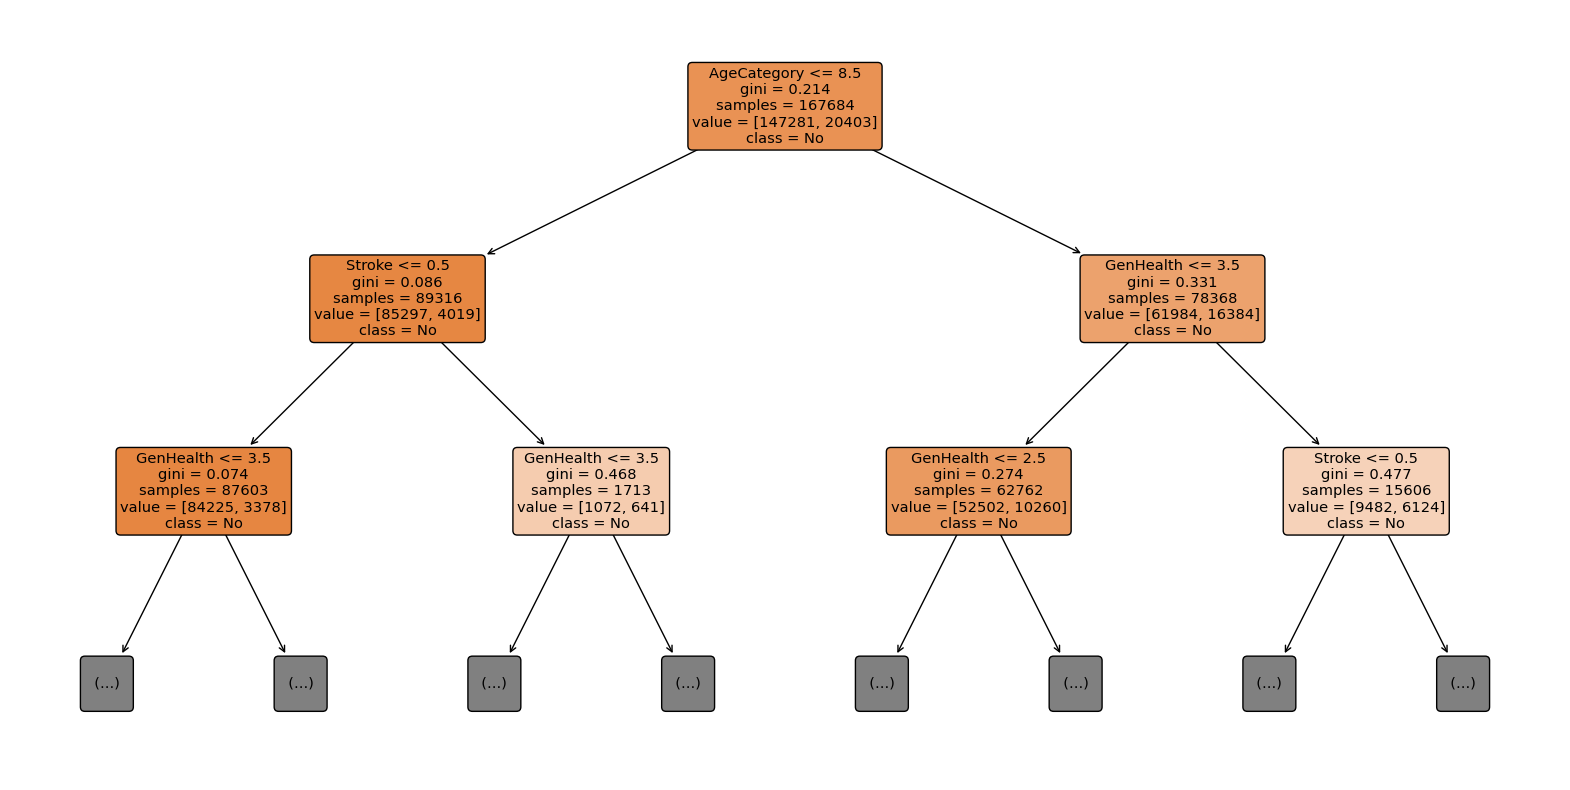

In [120]:
f = plt.figure(figsize=(10,10))
feature_names = x_train.columns.tolist()

with rc_context({'font.size': 60}):
    f = plt.figure(figsize=(20, 10))
    plot_tree(dectree, filled=True, rounded=True, max_depth=2,
              feature_names=feature_names, class_names=['No', 'Yes'])
    plt.show()

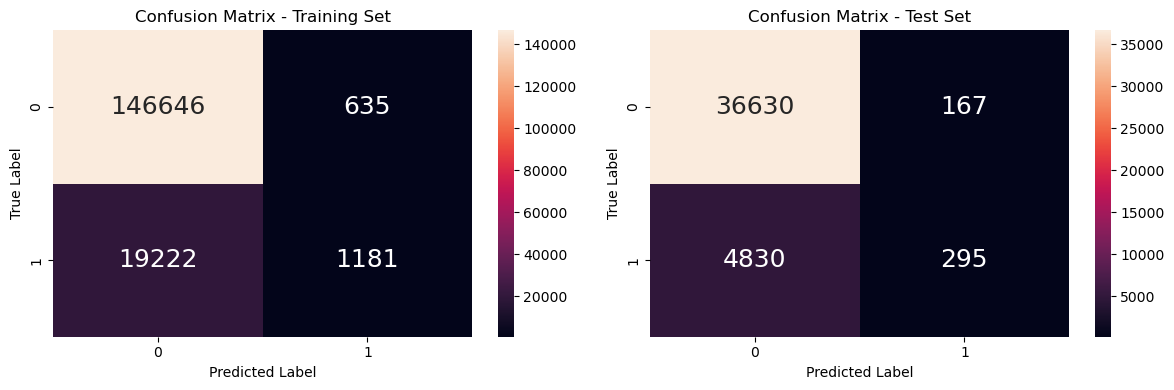

In [70]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

CM1 = confusion_matrix(y_train, y_train_pred)
TN1 = CM1[0][0]
FN1 = CM1[1][0]
TP1 = CM1[1][1]
FP1 = CM1[0][1]
TPR1 = TP1 / (TP1 + FN1)
FPR1 = FP1 / (TN1 + FP1)
TNR1 = TN1 / (TN1 + FP1)
FNR1 = FN1 / (TP1 + FN1)

CM2 = confusion_matrix(y_test, y_test_pred)
TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]
TPR2 = TP2 / (TP2 + FN2)
FPR2 = FP2 / (TN2 + FP2)
TNR2 = TN2 / (TN2 + FP2)
FNR2 = FN2 / (TP2 + FN2)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(CM1, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')  # Adding a title
axes[0].set_xlabel('Predicted Label')  # Adding x-axis label
axes[0].set_ylabel('True Label')  # Adding y-axis label

# Plotting the second confusion matrix for the test set
sns.heatmap(CM2, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')  # Adding a title
axes[1].set_xlabel('Predicted Label')  # Adding x-axis label
axes[1].set_ylabel('True Label')  # Adding y-axis label

# Display the plot
plt.tight_layout()  # Adjust layout to make room for titles
plt.show()

Evaluation Metrics:
ROC-AUC: 0.8178427164992905
Precision: 0.6385281385281385
F1 Score: 0.1056022910327546
Recall: 0.0575609756097561

Goodness of Fit
Train Dataset
Classification Accuracy is	 0.8815808306099568
The True Positive Rate is	 0.057883644562074205
The False Positive Rate is	 0.0043114862066390095

Test Dataset
Classification Accuracy is	 0.8808024426315538
The True Positive Rate is	 0.0575609756097561
The False Positive Rate is	 0.004538413457618827



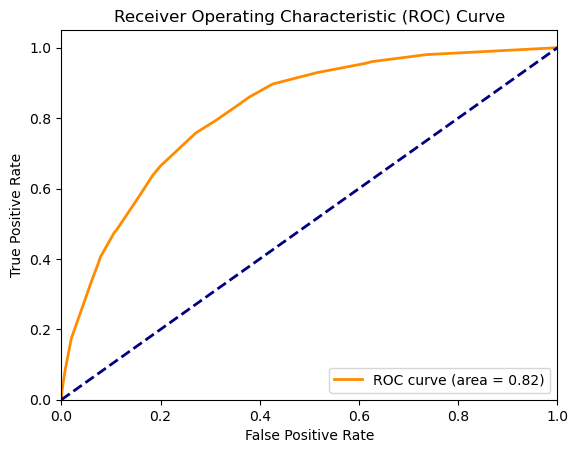

In [71]:

# Compute probabilities for the positive class
y_prob = dectree.predict_proba(x_test)[:, 1]

# Compute predictions
y_test_pred = dectree.predict(x_test)

roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("ROC-AUC:", roc_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)
print()

print("Goodness of Fit")
print("Train Dataset")
print("Classification Accuracy is\t", dectree.score(x_train, y_train))
print("The True Positive Rate is\t", TPR1)
print("The False Positive Rate is\t", FPR1)
#print("The True Negative Rate is\t", TNR1)
#print("The False Negative Rate is\t", FNR1)

print()

print("Test Dataset")
print("Classification Accuracy is\t", dectree.score(x_test, y_test))
print("The True Positive Rate is\t", TPR2)
print("The False Positive Rate is\t", FPR2)
#print("The True Negative Rate is\t", TNR2)
#print("The False Negative Rate is\t", FNR2)
print()


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

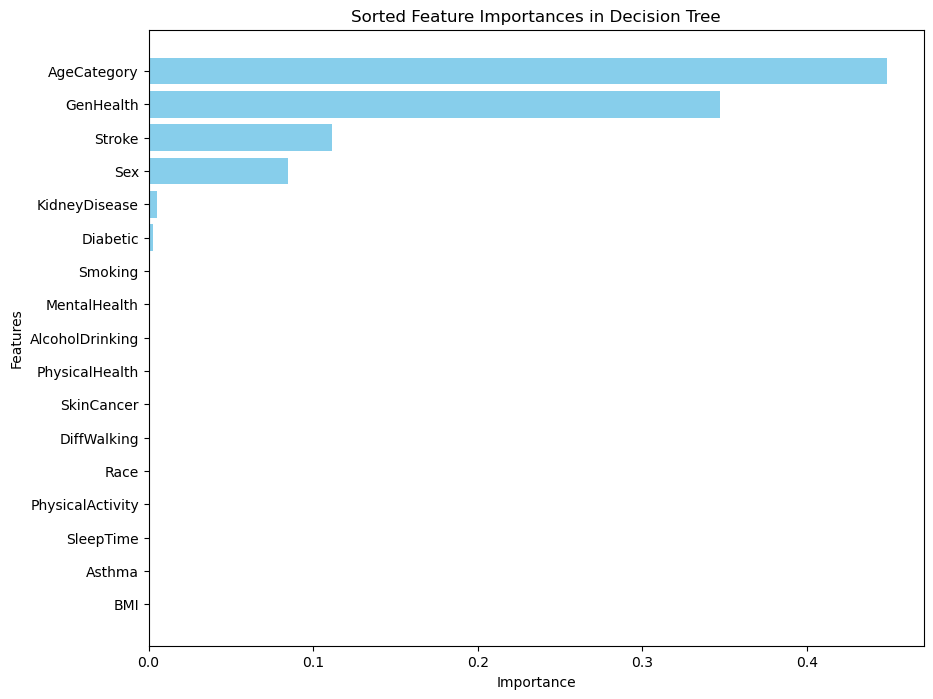

In [72]:
feature_importances = dectree.feature_importances_

# Create arrays from feature names and importances
features = np.array(feature_names)
importances = np.array(feature_importances)

# Sort the features by importance
indices = np.argsort(importances)
sorted_features = features[indices]
sorted_importances = importances[indices]

# Create a bar graph for the sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importances in Decision Tree')
plt.show()


### Random Forest

In [101]:
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='gini',         
    max_depth=6,          # Max depth of the tree
    min_samples_split=50,     # Min samples to split node
    min_samples_leaf=10      # Min samples to be leaf node
)

# Train the model on the training data
random_forest_model.fit(x_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}\n")

# Analyzing feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)


Accuracy: 0.88073088116025

Confusion Matrix:
[[36658   139]
 [ 4861   264]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     36797
           1       0.66      0.05      0.10      5125

    accuracy                           0.88     41922
   macro avg       0.77      0.52      0.52     41922
weighted avg       0.86      0.88      0.83     41922


Feature Importances:
 AgeCategory         0.291267
GenHealth           0.221984
Stroke              0.137743
DiffWalking         0.094200
Diabetic            0.074053
Sex                 0.046201
PhysicalHealth      0.043675
KidneyDisease       0.039764
Smoking             0.017024
SkinCancer          0.013223
Race                0.005671
BMI                 0.004479
PhysicalActivity    0.003797
MentalHealth        0.002937
SleepTime           0.002231
Asthma              0.001168
AlcoholDrinking     0.000584
dtype: float64


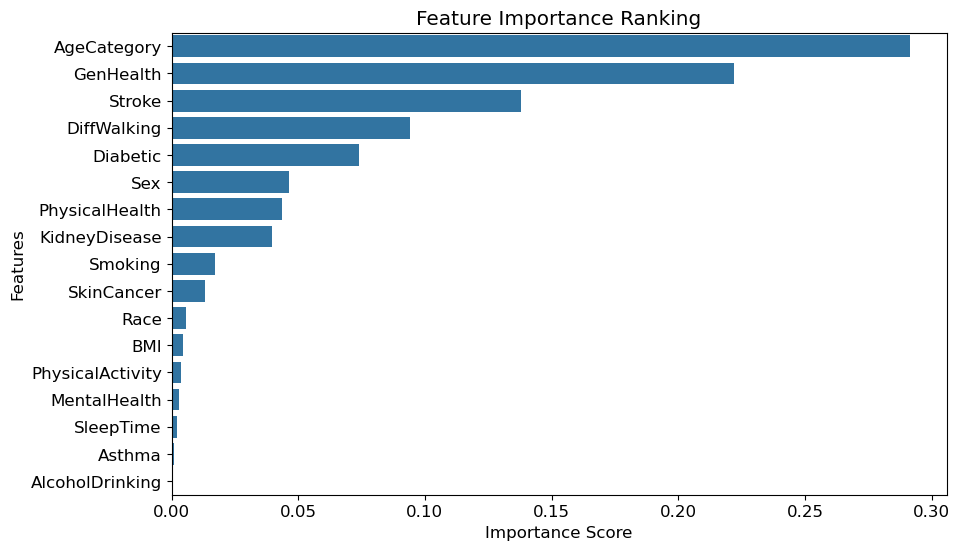

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

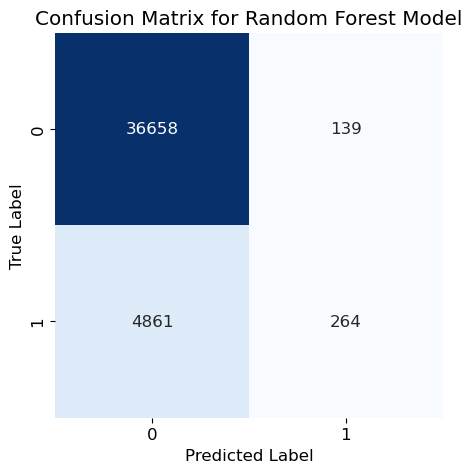

In [103]:
# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

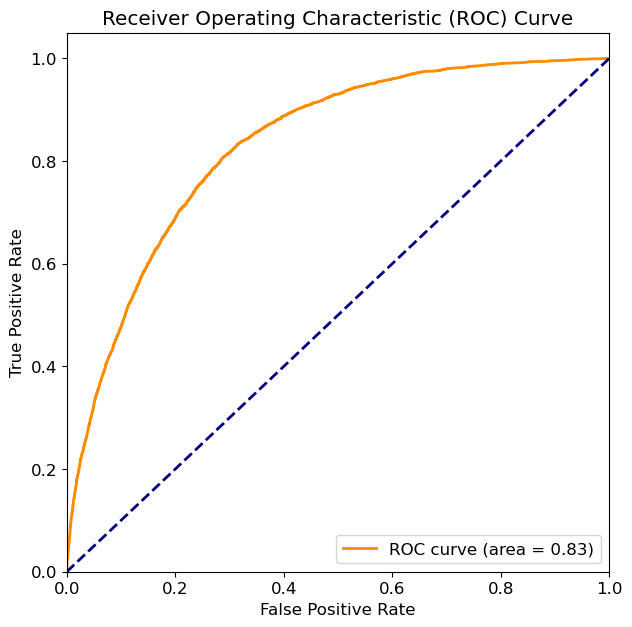

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Compute ROC curve and ROC area for each class
y_prob = random_forest_model.predict_proba(x_test)[:, 1] # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

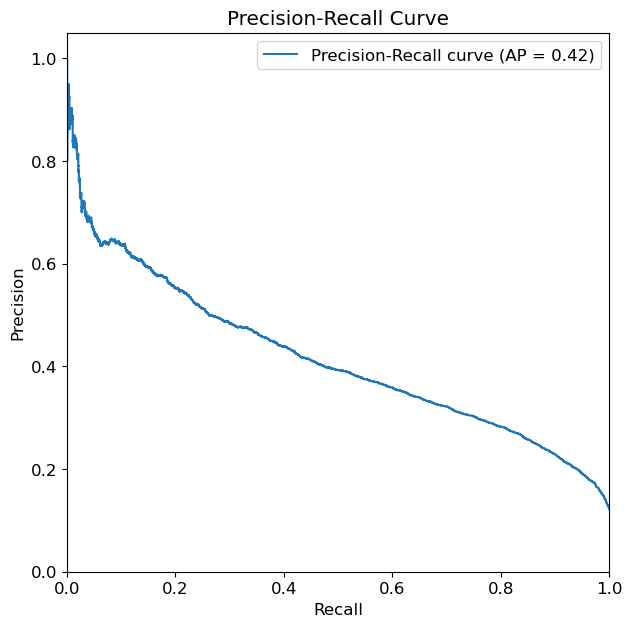

In [105]:
y_score = random_forest_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(7, 7))
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [100]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

Accuracy: 0.8809
Precision: 0.6506
Recall: 0.0552
F1-Score: 0.1018
ROC-AUC: 0.8309



### Neural Network

Training for fold 1 ...
Epoch 1/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step - binary_accuracy: 0.8871 - loss: 0.3052
Epoch 2/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 672us/step - binary_accuracy: 0.9103 - loss: 0.2432
Epoch 3/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 724us/step - binary_accuracy: 0.9115 - loss: 0.2400
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
Score for fold 1: loss of 0.2365095019340515; compile_metrics of 91.22400283813477%

Training for fold 2 ...
Epoch 1/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 675us/step - binary_accuracy: 0.8868 - loss: 0.3047
Epoch 2/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - binary_accuracy: 0.9099 - loss: 0.2436
Epoch 3/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - binary_accuracy: 0.9110 - loss: 0.2407
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
Score for fold 2: loss of 0.24254049360752106; compile_metrics of 91.19998216629028%

Training for fold 3 ...
E

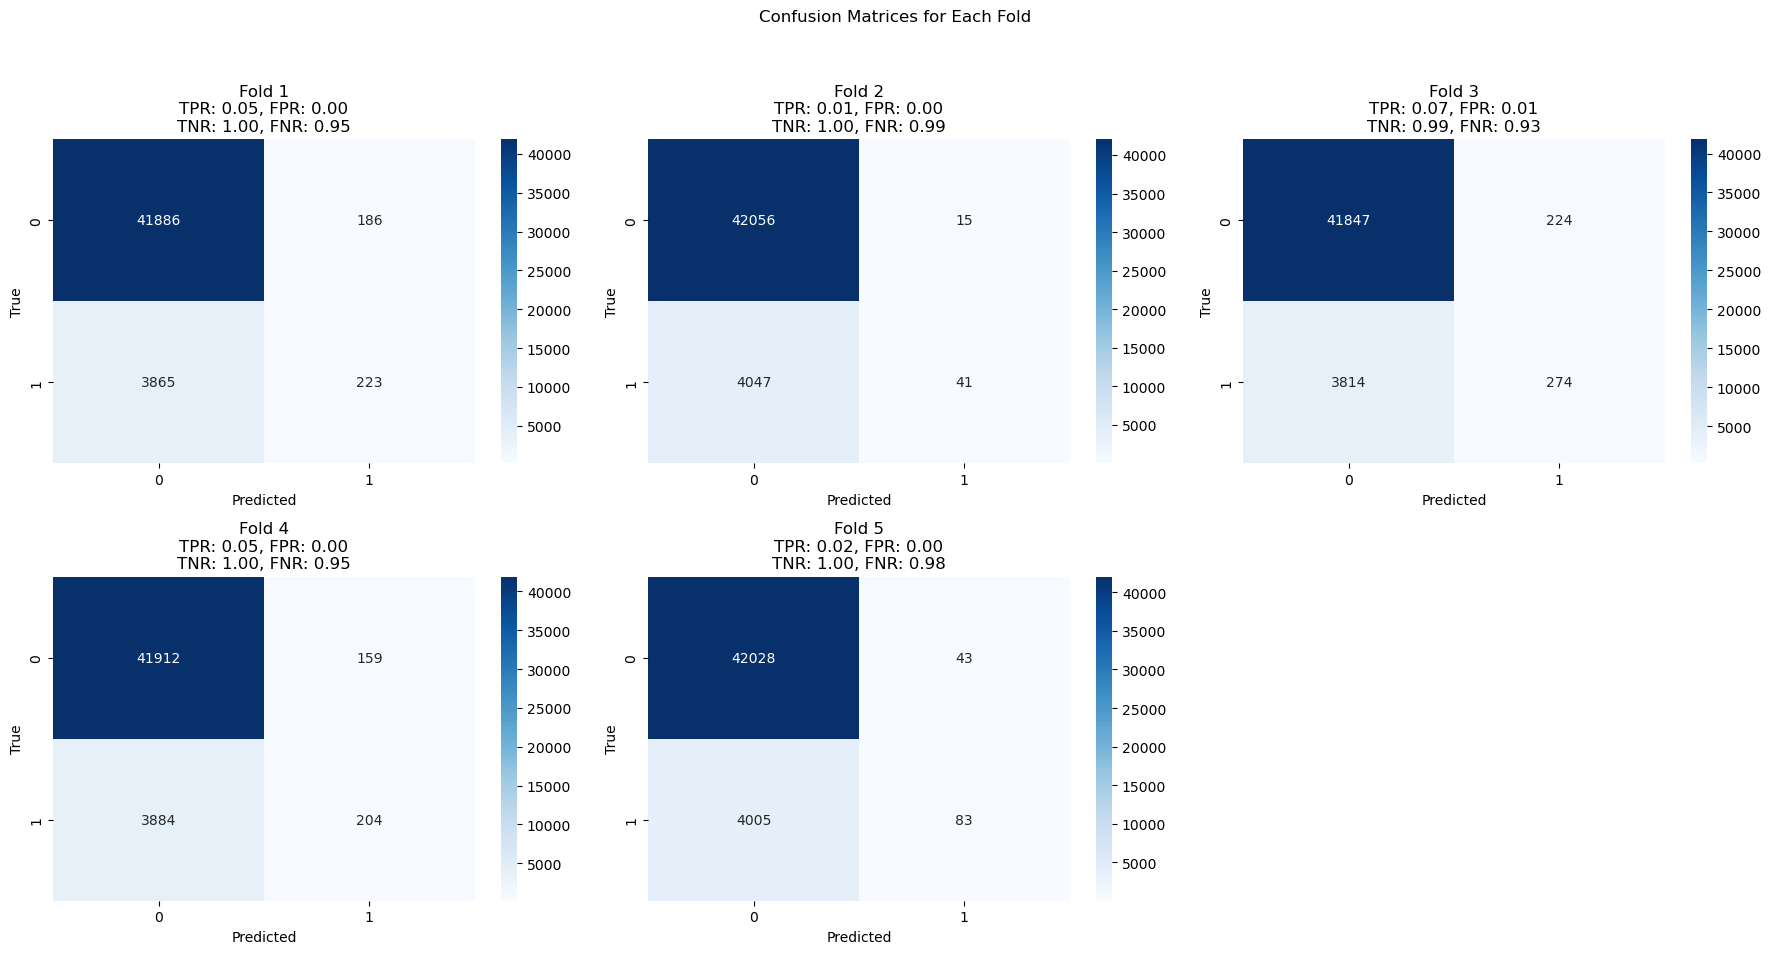

In [37]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    
    # Building the Neural Network Model with three layers
    model = keras.Sequential([
        
        # First dense layer with ReLU activation to capture non-linear relationships
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Repeat the above layers to increase the model's ability to learn complex patterns
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Output layer using sigmoid activation to predict a binary outcome
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(
    optimizer='adam',  # effective use of the adaptive learning rate that helps in 
                       # converging faster and more efficiently.
        
    loss='binary_crossentropy',  # Binary crossentropy is used for binary classification tasks.
                                 # Instead of categorical_crossentropy.
        
    metrics=['binary_accuracy']  # 'binary_accuracy' checks the proportion of correct predictions.
    )
   
    model.fit(
    x_train.iloc[train],  
    y_train.iloc[train],  
    batch_size=32,        # Number of samples per gradient update. 
        
    epochs=3,             # Number of epochs to train the model. 
                          # An epoch is an iteration over the entire data provided.
        
    verbose=1             
    )
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

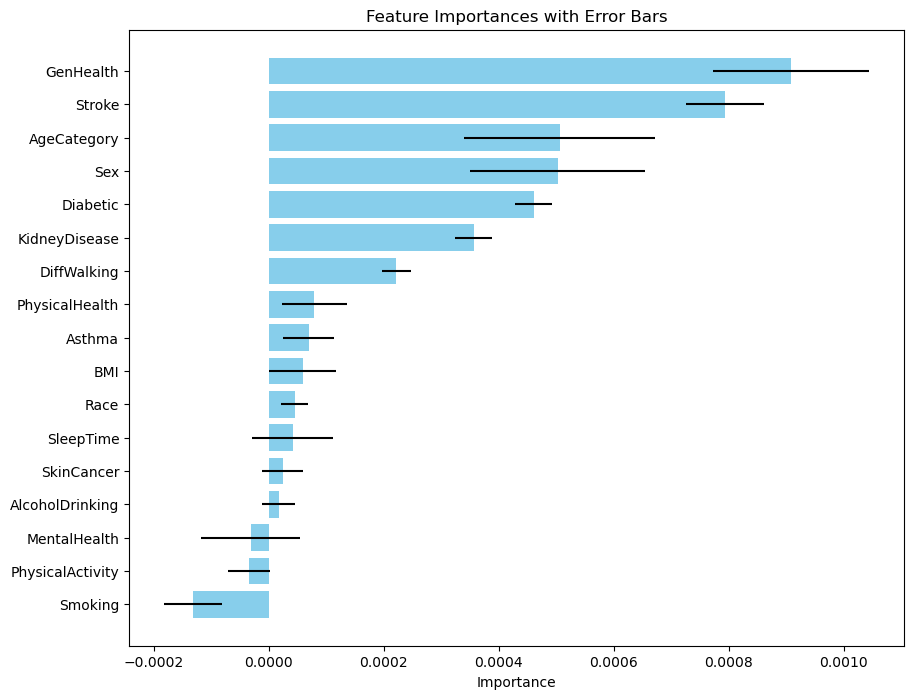

In [38]:
# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy

# Wrap your model
wrapped_model = KerasClassifierWrapper(model)

perm = PermutationImportance(wrapped_model, random_state=1).fit(x_test, y_test)
importances = perm.feature_importances_
std = perm.feature_importances_std_

# Get feature names
feature_names = x_train.columns.tolist()

data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort data by importance for better visualization
data_sorted = data.sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Feature'], data_sorted['Importance'], xerr=data_sorted['Std'], align='center', color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances with Error Bars')
plt.show()

---

#### Taking 70% of 0 and 100% of 1 for 'HeartDisease' same size

In [15]:
# Load the datasets from CSV files
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Combine the train and test sets back to form the complete dataset
x = pd.concat([x_train, x_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)
df_clean = pd.concat([x, y], axis=1)

# Count the number of instances for each class
num_yes = len(df_clean[df_clean["HeartDisease"] == 1])
num_no = len(df_clean[df_clean["HeartDisease"] == 0])

print("Original counts:\nYes:", num_yes, "\nNo: ", num_no)

# Separate the data by class
df_yes = df_clean[df_clean["HeartDisease"] == 1]
df_no = df_clean[df_clean["HeartDisease"] == 0]

# Combine the sampled 'Yes' class with the 'No' class
df_clean = pd.concat([df_yes, df_no_sampled])

# Split into training and testing sets
x = df_clean.drop('HeartDisease', axis=1)  
y = df_clean['HeartDisease']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Print the counts in the training and test sets
print("\nTraining set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])


Original counts:
Yes: 25528 
No:  262968

Counts after sampling 70% of 'Yes' class:
Yes: 25528 
No:  184078

Training set size: 167684
Test set size: 41922


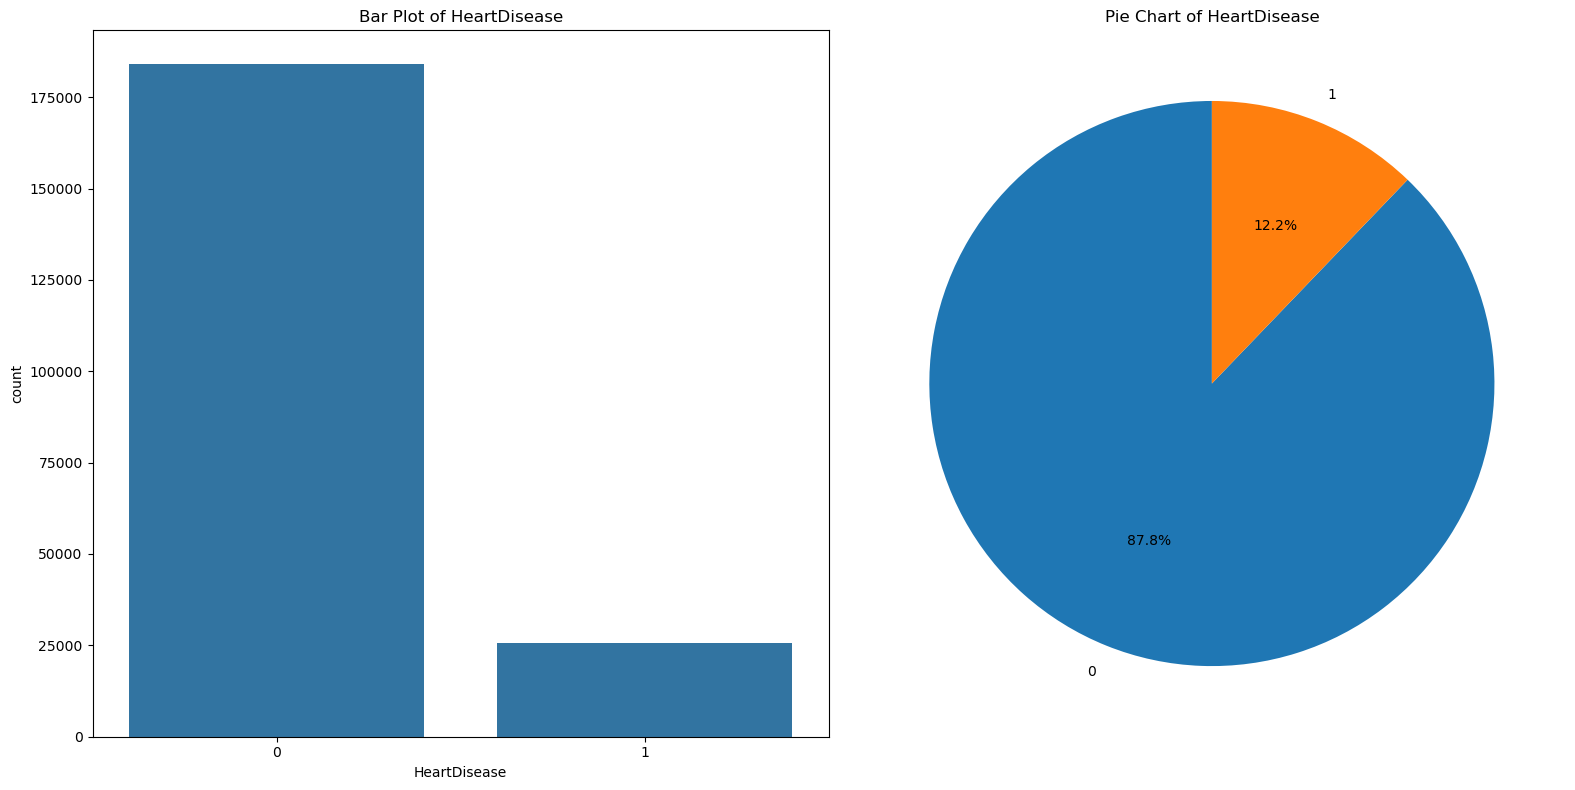

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Bar plot
sns.countplot(x='HeartDisease', data=df_clean, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_clean['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()


----

#### Redo the model

#### Classification Tree

In [41]:
dectree = DecisionTreeClassifier(max_depth = 5)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

Goodness of Fit
Train Dataset
Classification Accuracy is	 0.8817239569666754
The True Positive Rate is	 0.13684262118315935
The False Positive Rate is	 0.015086806852207684

Test Dataset
Classification Accuracy is	 0.8801106817422832
The True Positive Rate is	 0.12839024390243903
The False Positive Rate is	 0.015191455825203141



<Axes: >

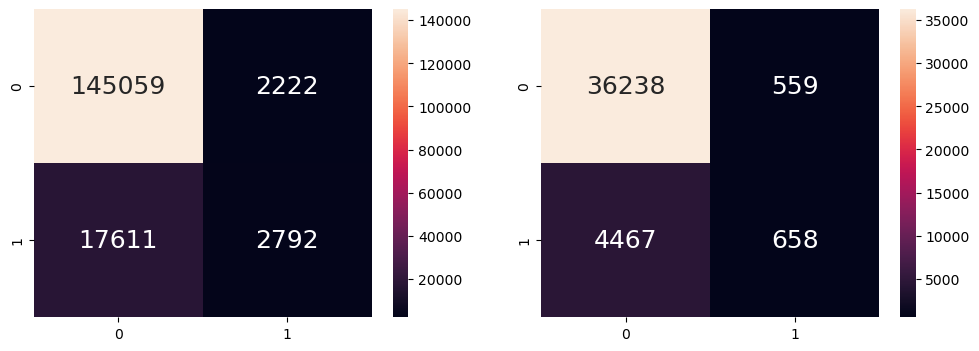

In [43]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

CM1 = confusion_matrix(y_train, y_train_pred)
TN1 = CM1[0][0]
FN1 = CM1[1][0]
TP1 = CM1[1][1]
FP1 = CM1[0][1]
TPR1 = TP1 / (TP1 + FN1)
FPR1 = FP1 / (TN1 + FP1)
TNR1 = TN1 / (TN1 + FP1)
FNR1 = FN1 / (TP1 + FN1)

CM2 = confusion_matrix(y_test, y_test_pred)
TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]
TPR2 = TP2 / (TP2 + FN2)
FPR2 = FP2 / (TN2 + FP2)
TNR2 = TN2 / (TN2 + FP2)
FNR2 = FN2 / (TP2 + FN2)

print("Goodness of Fit")
print("Train Dataset")
print("Classification Accuracy is\t", dectree.score(x_train, y_train))
print("The True Positive Rate is\t", TPR1)
print("The False Positive Rate is\t", FPR1)
#print("The True Negative Rate is\t", TNR1)
#print("The False Negative Rate is\t", FNR1)

print()

print("Test Dataset")
print("Classification Accuracy is\t", dectree.score(x_test, y_test))
print("The True Positive Rate is\t", TPR2)
print("The False Positive Rate is\t", FPR2)
#print("The True Negative Rate is\t", TNR2)
#print("The False Negative Rate is\t", FNR2)
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(CM1,annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(CM2, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<Figure size 4000x4000 with 0 Axes>

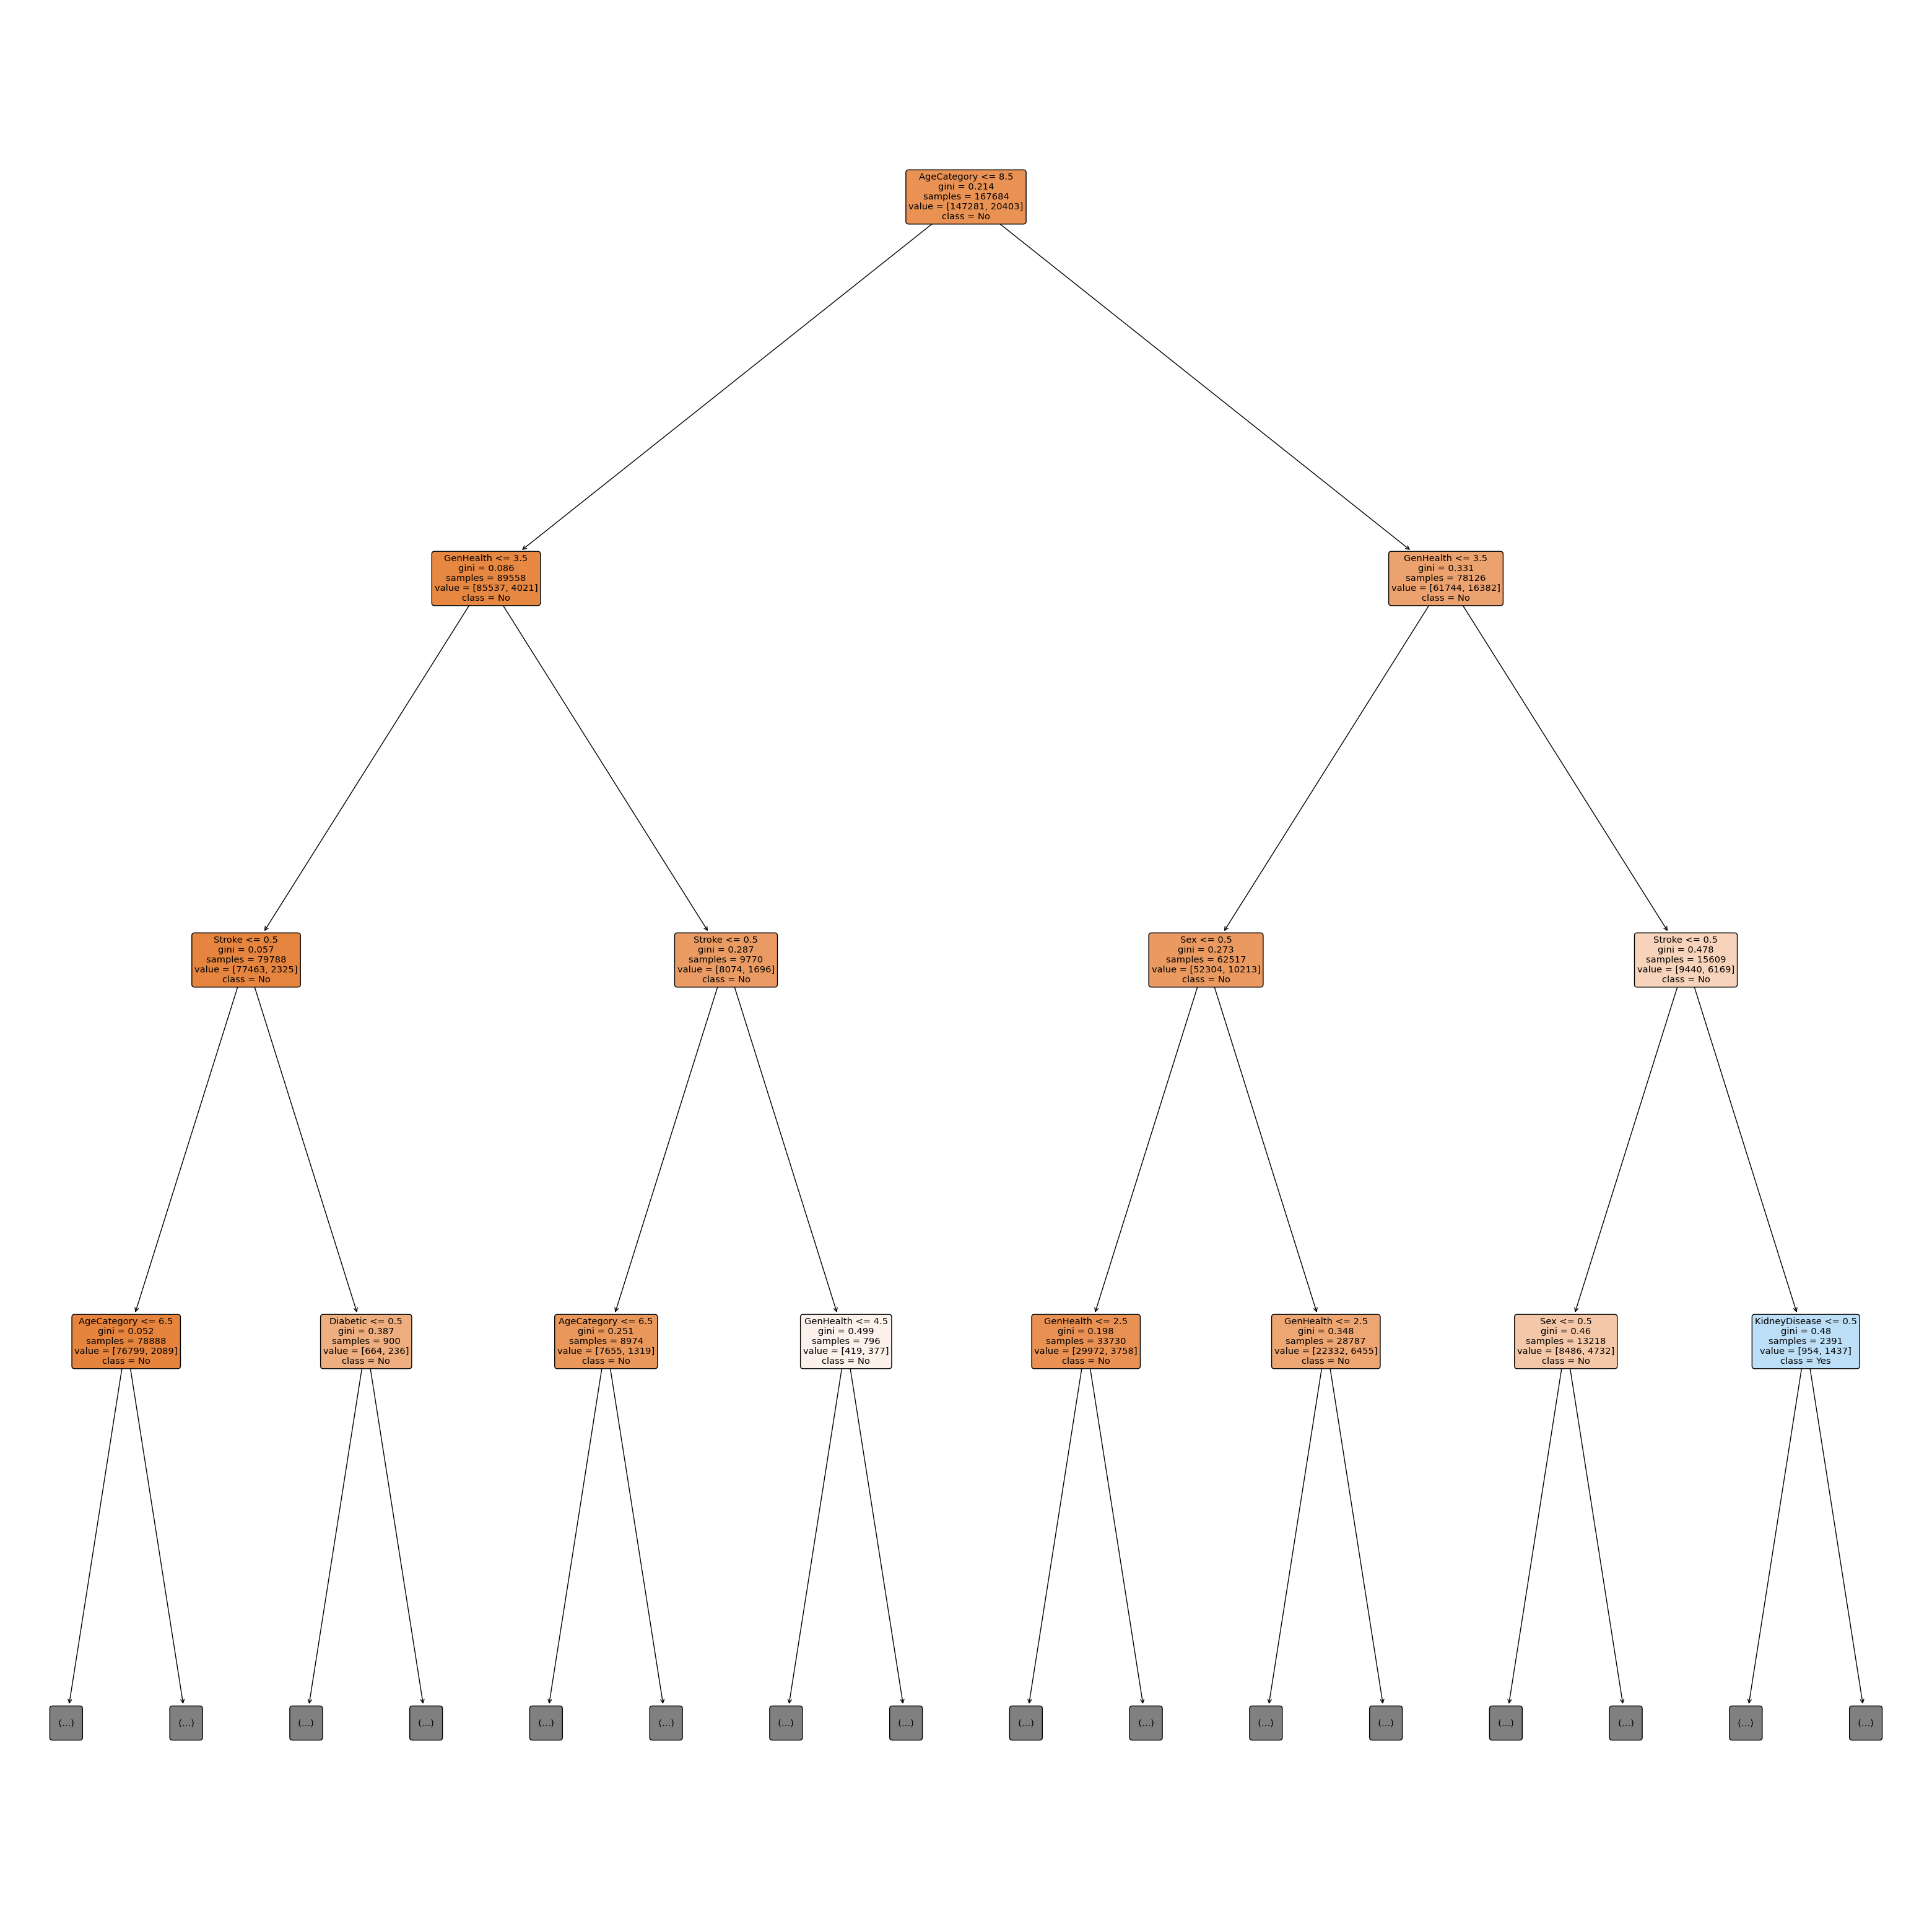

In [44]:
f = plt.figure(figsize=(40,40))
feature_names = x_train.columns.tolist()
with rc_context({'font.size': 20}):
    f = plt.figure(figsize=(40, 40))
    plot_tree(dectree, filled=True, rounded=True, max_depth=3,
              feature_names=feature_names, class_names=['No', 'Yes'])
    plt.show()

----

#### Random Forest

In [45]:
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(x_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}\n")

# Analyzing feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Accuracy: 0.8684461619197558

Confusion Matrix:
[[35433  1364]
 [ 4151   974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36797
           1       0.42      0.19      0.26      5125

    accuracy                           0.87     41922
   macro avg       0.66      0.58      0.59     41922
weighted avg       0.84      0.87      0.85     41922


Feature Importances:
 BMI                 0.341890
AgeCategory         0.117496
SleepTime           0.097984
PhysicalHealth      0.075726
GenHealth           0.067757
MentalHealth        0.064378
Race                0.034451
Stroke              0.026878
PhysicalActivity    0.025695
DiffWalking         0.024122
Sex                 0.022388
Asthma              0.020094
Diabetic            0.019958
Smoking             0.019930
SkinCancer          0.017535
KidneyDisease       0.014029
AlcoholDrinking     0.009690
dtype: float64


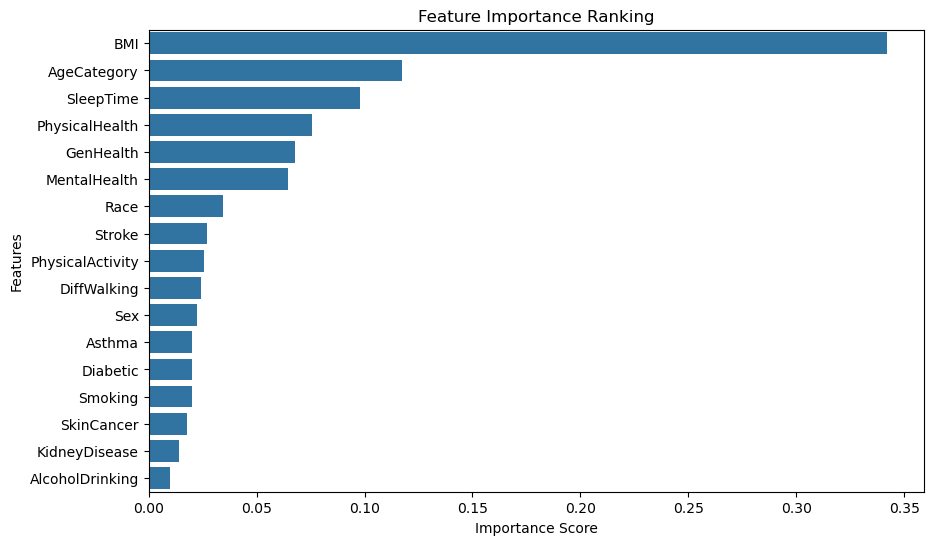

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

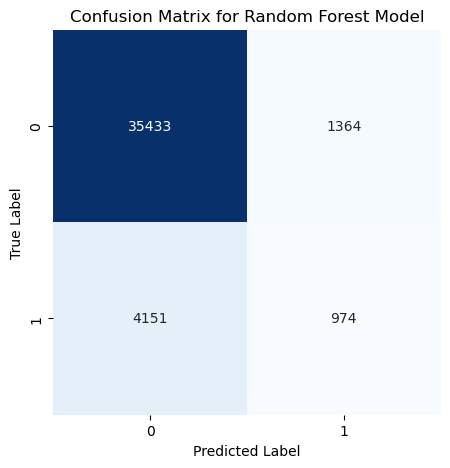

In [47]:
# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

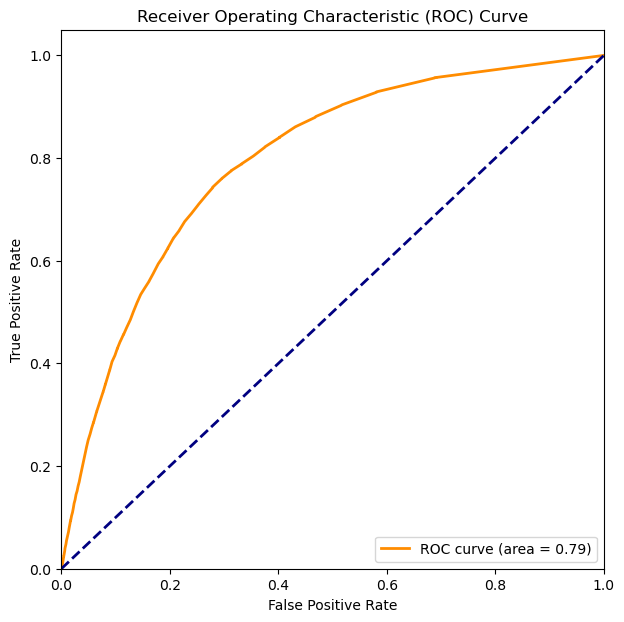

In [48]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = random_forest_model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)  # Ensure auc is callable from sklearn.metrics and not overwritten

# Plotting the ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Using f-string for clarity
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


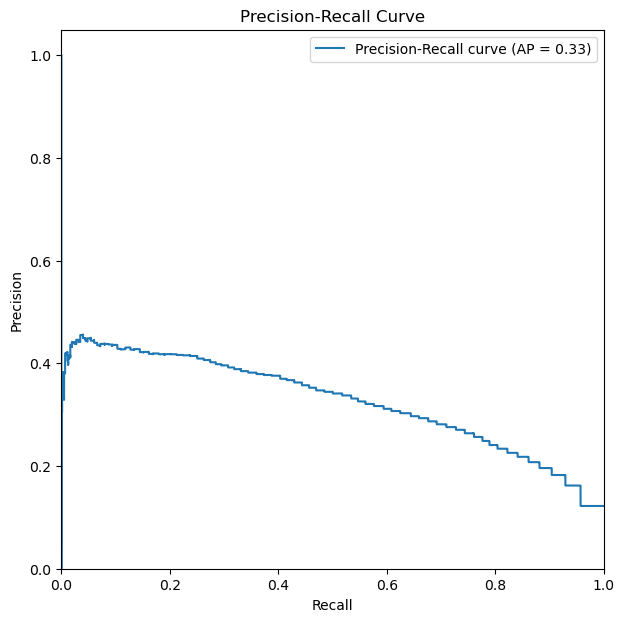

In [49]:
y_score = random_forest_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(7, 7))
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

----

#### Neural Network

Training for fold 1 ...
Epoch 1/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - binary_accuracy: 0.8522 - loss: 0.3652
Epoch 2/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 680us/step - binary_accuracy: 0.8805 - loss: 0.2953
Epoch 3/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 679us/step - binary_accuracy: 0.8805 - loss: 0.2930
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
Score for fold 1: loss of 0.2880880534648895; compile_metrics of 88.30843567848206%

Training for fold 2 ...
Epoch 1/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - binary_accuracy: 0.8507 - loss: 0.3655
Epoch 2/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 690us/step - binary_accuracy: 0.8797 - loss: 0.2963
Epoch 3/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - binary_accuracy: 0.8812 - loss: 0.2911
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
Score for fold 2: loss of 0.29486894607543945; compile_metrics of 88.1742537021637%

Training for fold 3 ...
Ep

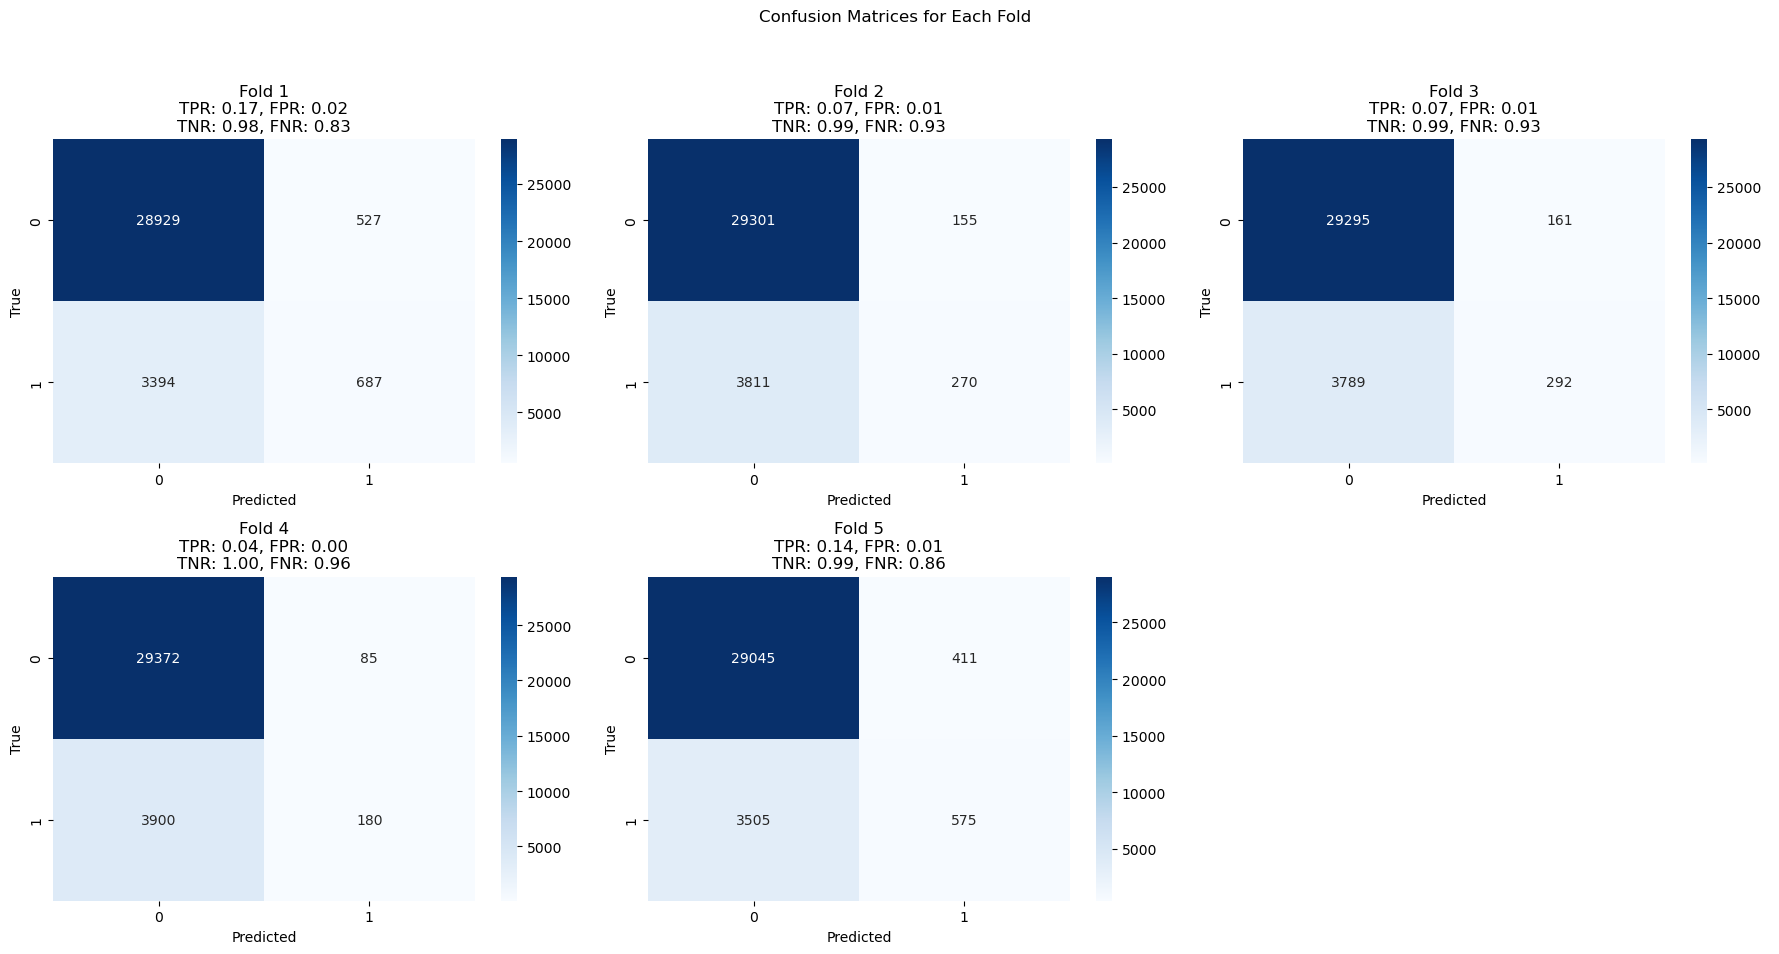

In [50]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

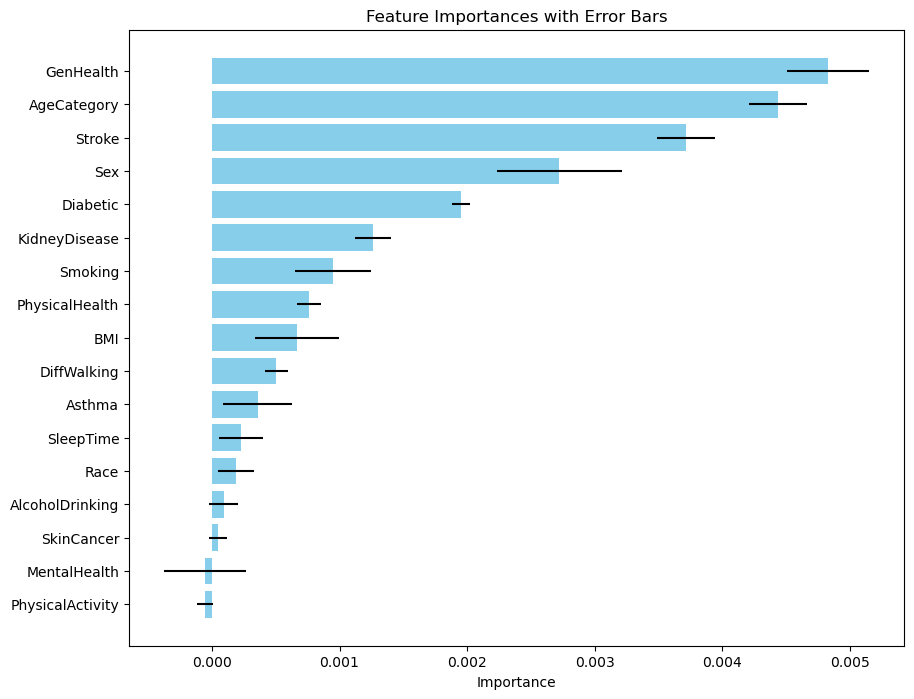

In [52]:
# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy

# Wrap your model
wrapped_model = KerasClassifierWrapper(model)

perm = PermutationImportance(wrapped_model, random_state=1).fit(x_test, y_test)
importances = perm.feature_importances_
std = perm.feature_importances_std_

feature_names = x_train.columns.tolist()

data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort data by importance for better visualization
data_sorted = data.sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Feature'], data_sorted['Importance'], xerr=data_sorted['Std'], align='center', color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances with Error Bars')
plt.show()

### Resampling

Oversampling

Before SMOTE:
Yes: 20403
No: 147281

After SMOTE:
Yes: 147281
No: 147281


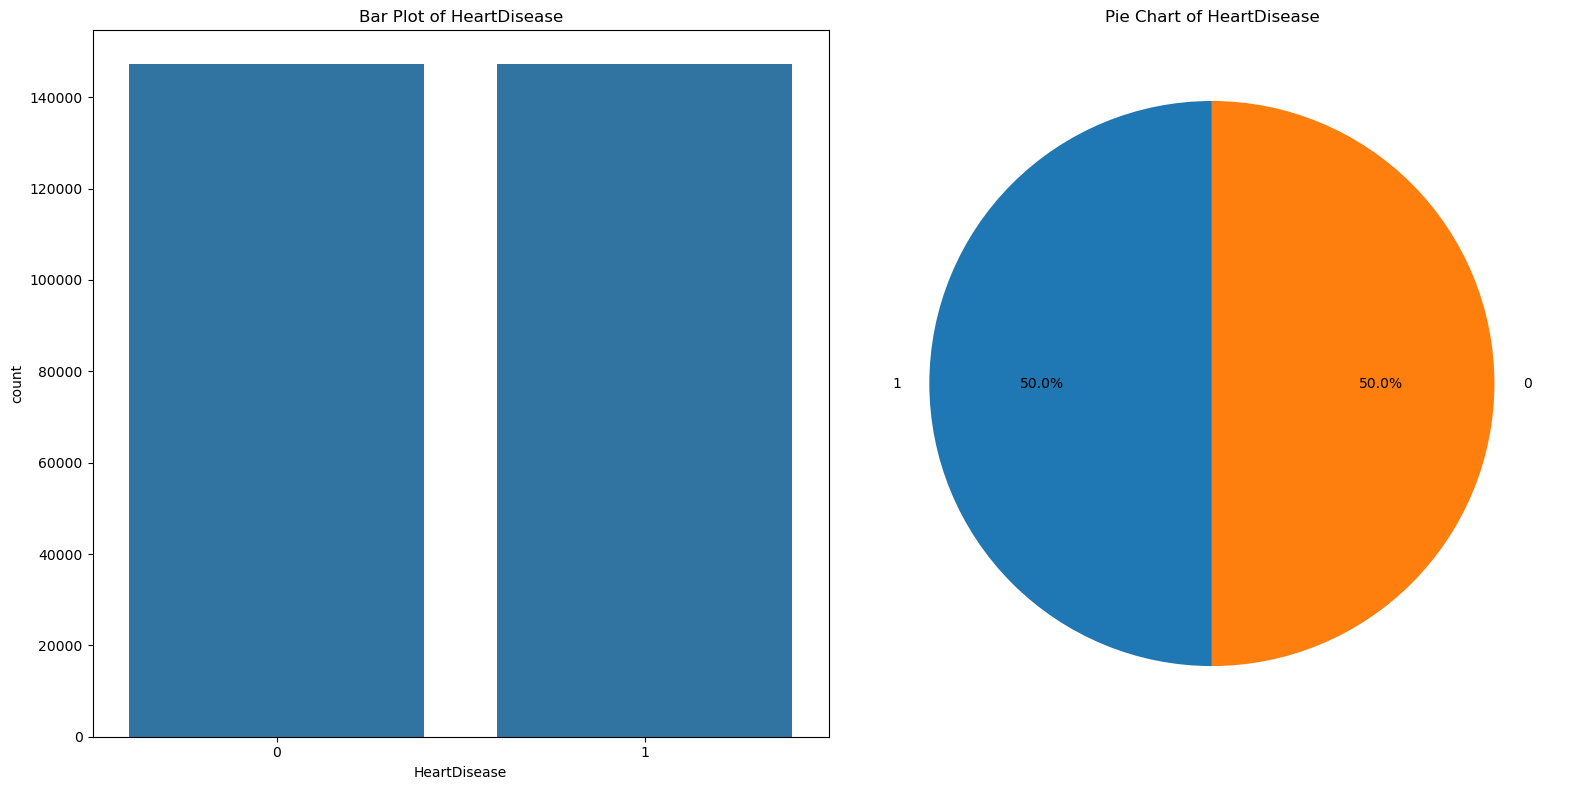

In [53]:
from imblearn.over_sampling import SMOTE

x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

counts_before = y_train.value_counts()
print("Before SMOTE:")
print(f"Yes: {counts_before.get(1, 0)}")  # get(1, 0) returns the count of '1' (yes), defaults to 0 if not present
print(f"No: {counts_before.get(0, 0)}")  # get(0, 0) returns the count of '0' (no), defaults to 0 if not present

print()
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
x_train, y_train = smote.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After SMOTE:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 678us/step - binary_accuracy: 0.7150 - loss: 0.5703
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 688us/step - binary_accuracy: 0.7389 - loss: 0.5319
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 681us/step - binary_accuracy: 0.7392 - loss: 0.5262
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 1: loss of 0.519558846950531; compile_metrics of 74.63548183441162%

Training for fold 2 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 683us/step - binary_accuracy: 0.7188 - loss: 0.5682
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 688us/step - binary_accuracy: 0.7383 - loss: 0.5302
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 684us/step - binary_accuracy: 0.7411 - loss: 0.5249
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 262us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 2: loss of 0.5206208229064941; compile_metrics of 74.61001873016357%

Training for fold 3 ...
Epo

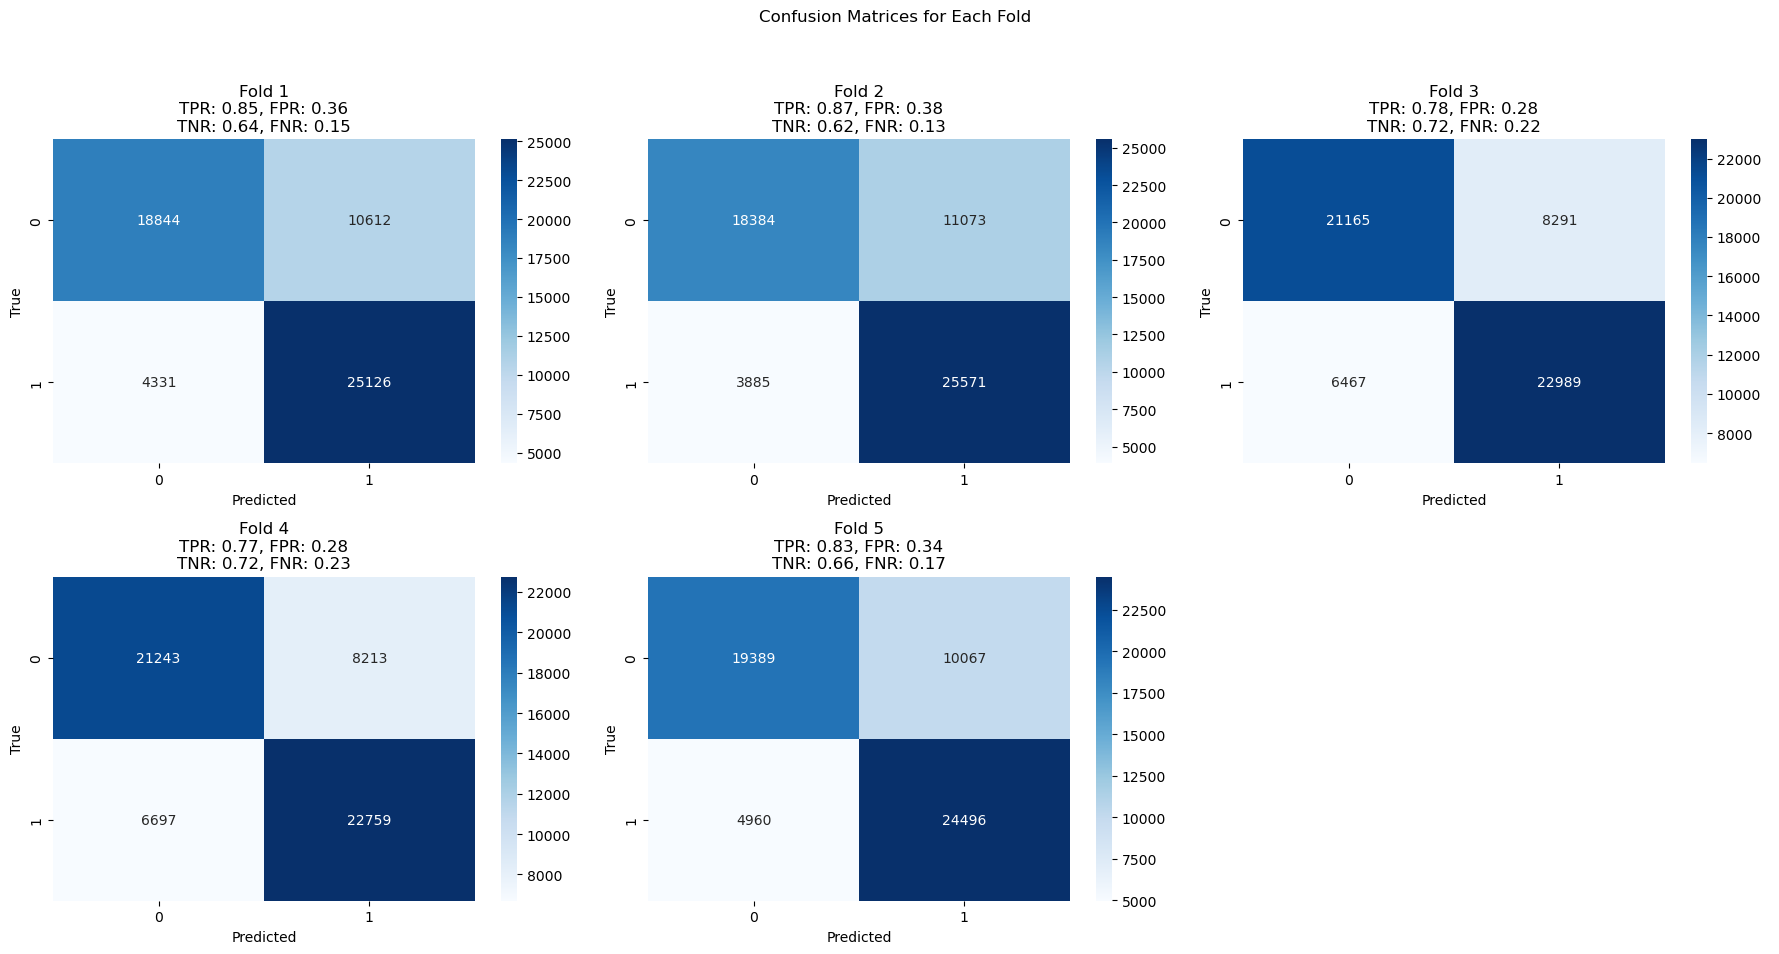

In [54]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

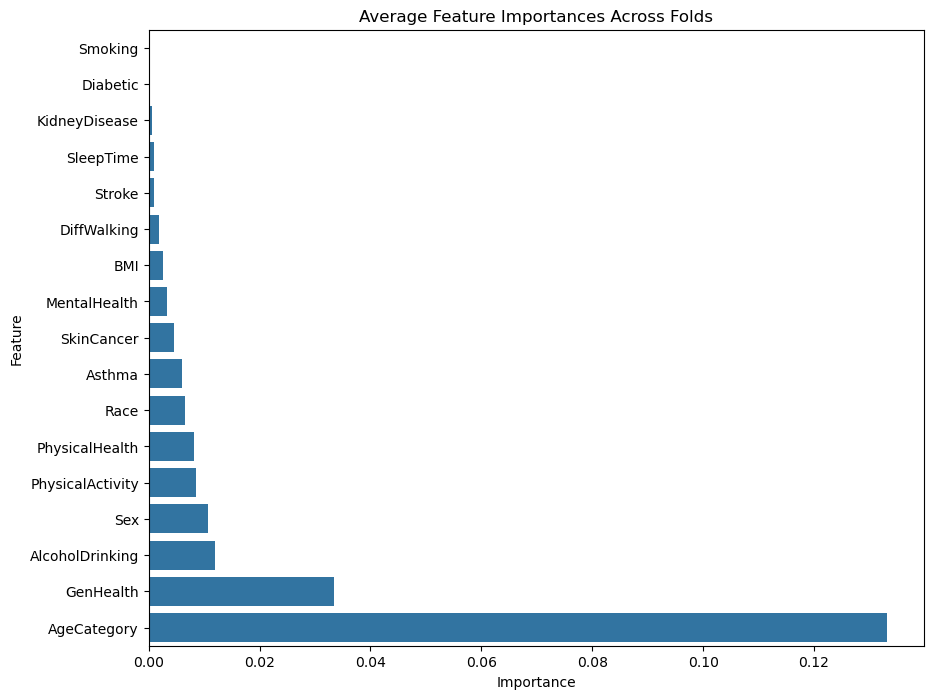

In [55]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

Undersampling the Majority Class

Before:
Yes: 20403
No: 147281
After Undersampling the Majority Class:
Yes: 20403
No: 20403


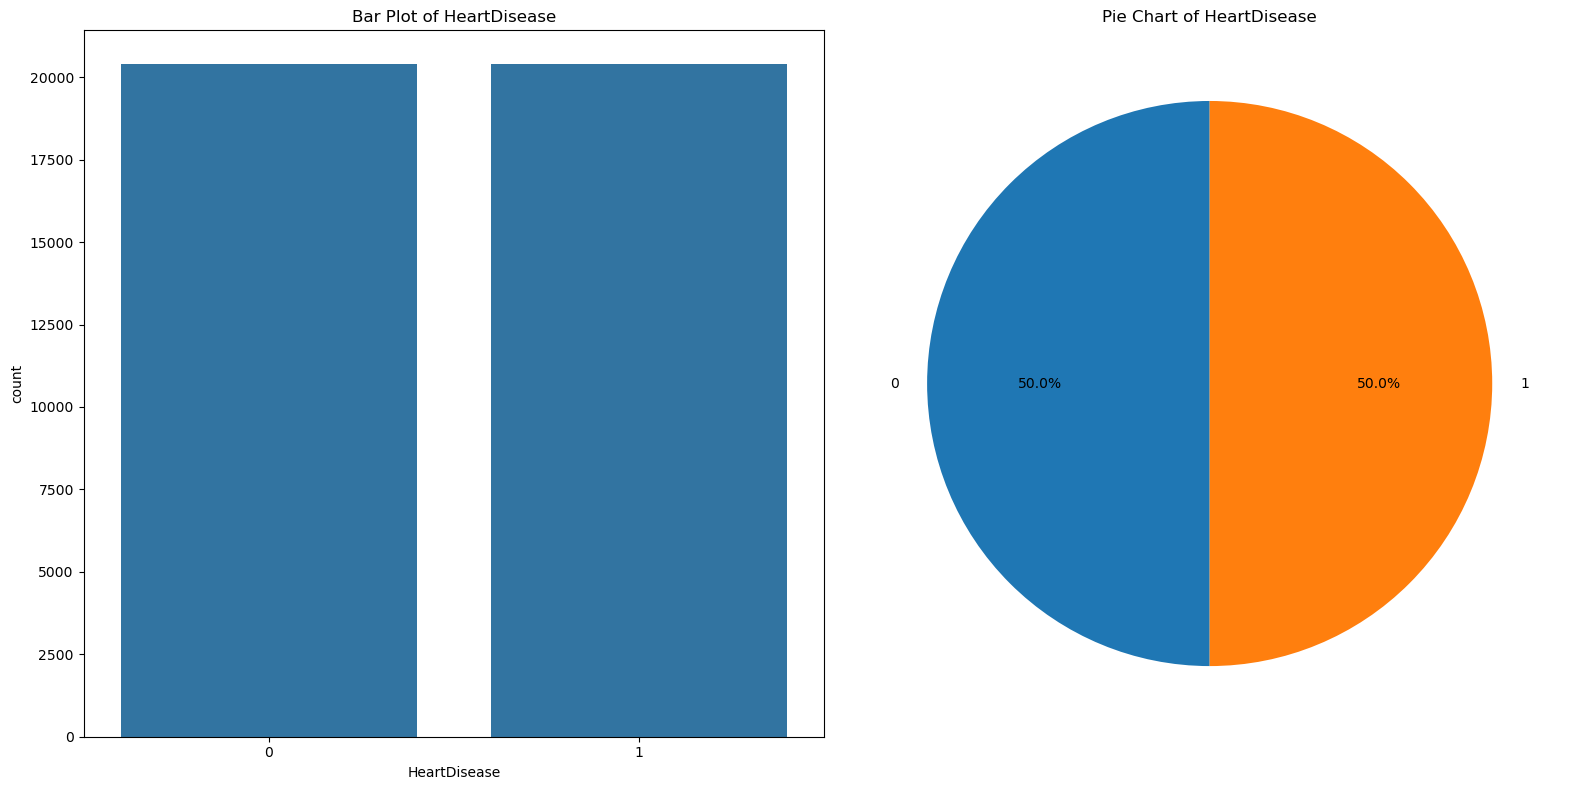

In [56]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Resample the training data
x_train, y_train = rus.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After Undersampling the Majority Class:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - binary_accuracy: 0.6977 - loss: 0.6283
Epoch 2/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - binary_accuracy: 0.7463 - loss: 0.5263
Epoch 3/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - binary_accuracy: 0.7439 - loss: 0.5201
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
Score for fold 1: loss of 0.5144352912902832; compile_metrics of 74.45479035377502%

Training for fold 2 ...
Epoch 1/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - binary_accuracy: 0.7016 - loss: 0.6175
Epoch 2/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - binary_accuracy: 0.7419 - loss: 0.5297
Epoch 3/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - binary_accuracy: 0.7437 - loss: 0.5230
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Score for fold 2: loss of 0.49436113238334656; compile_metrics of 75.57897567749023%

Training for fold 3 ...
Epoch 1/3

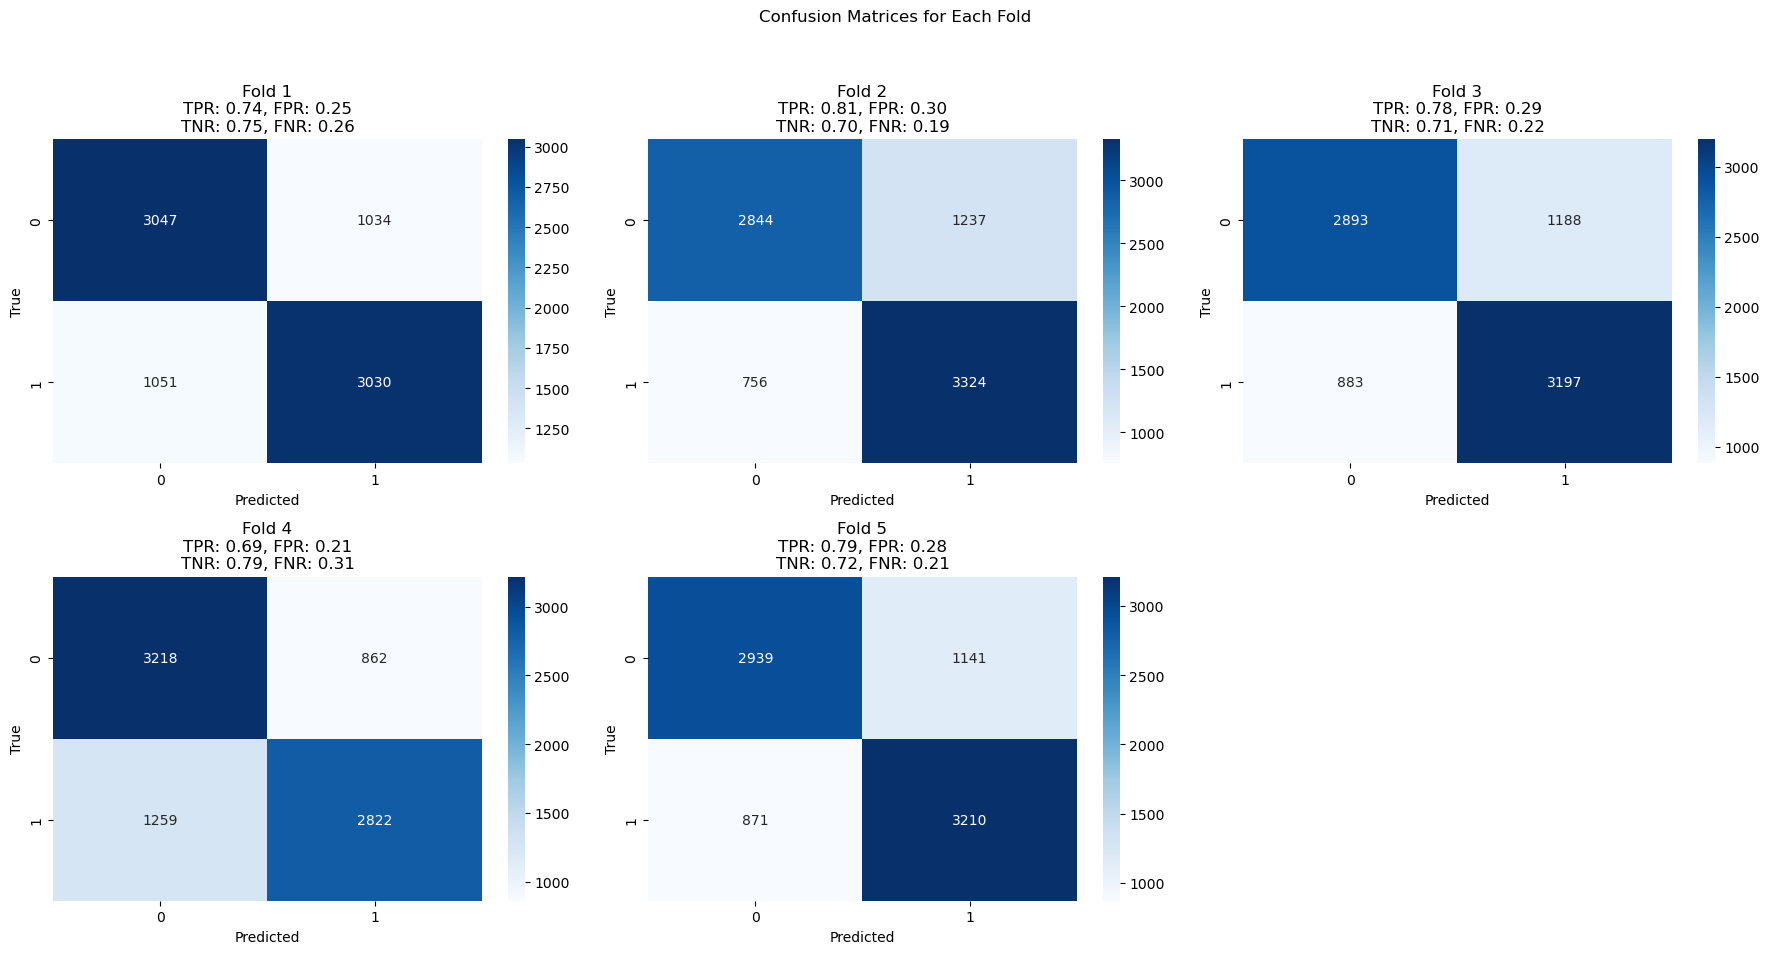

In [57]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

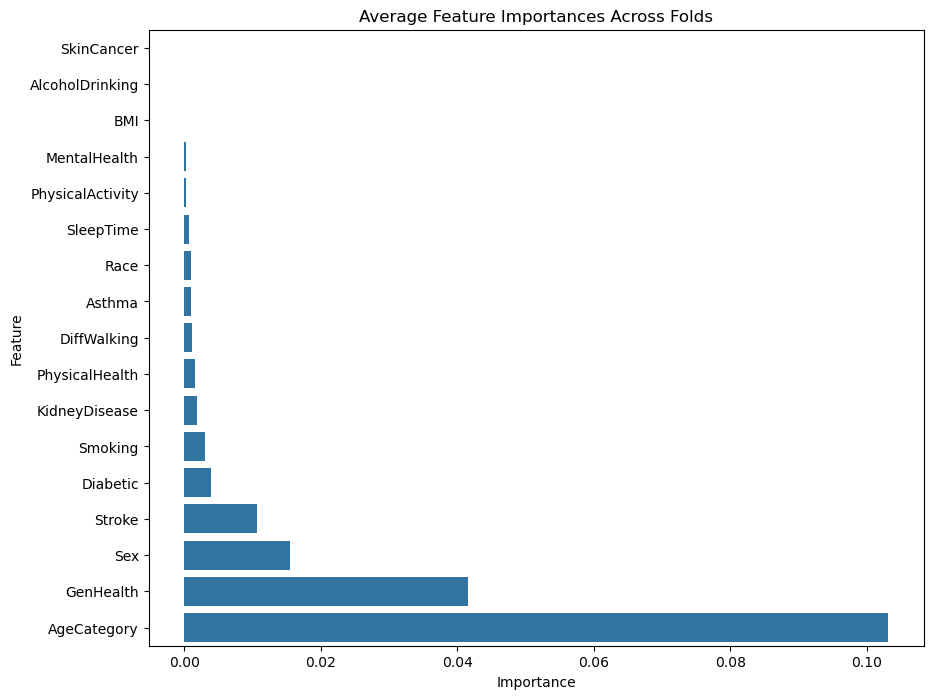

In [58]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

combination of both oversampling the minority and undersampling the majority

Before:
Yes: 20403
No: 147281
After smt:
Yes: 145818
No: 145818


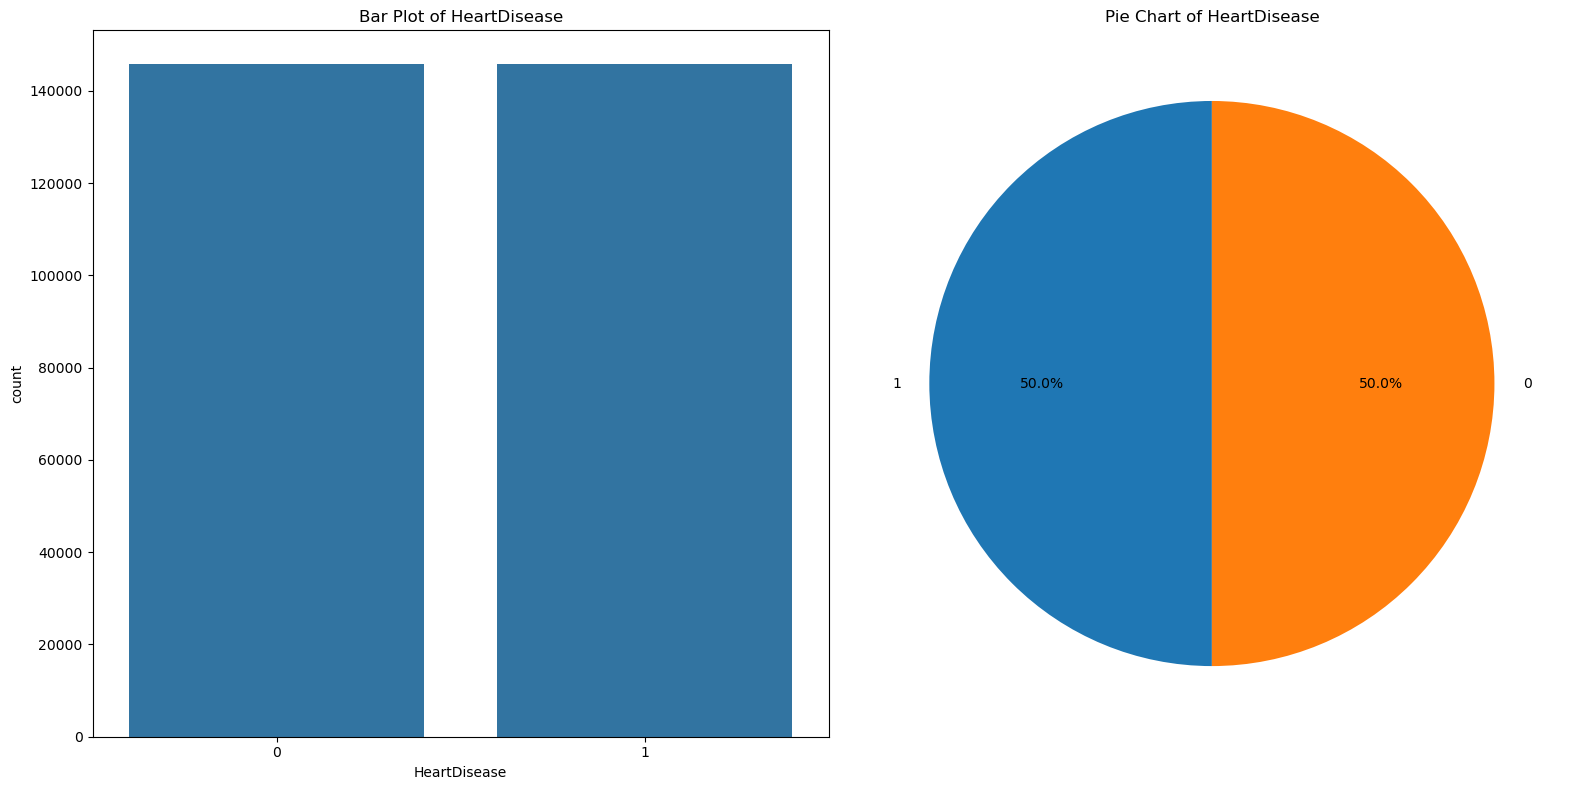

In [59]:
from imblearn.combine import SMOTETomek

x,y = df_clean.drop(["HeartDisease"], axis=1), df_clean["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

counts_before = y_train.value_counts()
print("Before:")
print(f"Yes: {counts_before.get(1, 0)}")  # get(1, 0) returns the count of '1' (yes), defaults to 0 if not present
print(f"No: {counts_before.get(0, 0)}")  # get(0, 0) returns the count of '0' (no), defaults to 0 if not present

# Create a SMOTETomek object (which combines SMOTE and Tomek links for cleaning)
smt = SMOTETomek(random_state=42)

# Resample the training data
x_train, y_train = smt.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After smt:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 6s 684us/step - binary_accuracy: 0.7214 - loss: 0.5658
Epoch 2/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 687us/step - binary_accuracy: 0.7404 - loss: 0.5276
Epoch 3/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 703us/step - binary_accuracy: 0.7385 - loss: 0.5269
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
Score for fold 1: loss of 0.5140590667724609; compile_metrics of 75.03085732460022%

Training for fold 2 ...
Epoch 1/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 6s 714us/step - binary_accuracy: 0.7231 - loss: 0.5624
Epoch 2/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step - binary_accuracy: 0.7415 - loss: 0.5263
Epoch 3/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 713us/step - binary_accuracy: 0.7407 - loss: 0.5277
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 2: loss of 0.5137571692466736; compile_metrics of 74.82298016548157%

Training for fold 3 ...
Ep

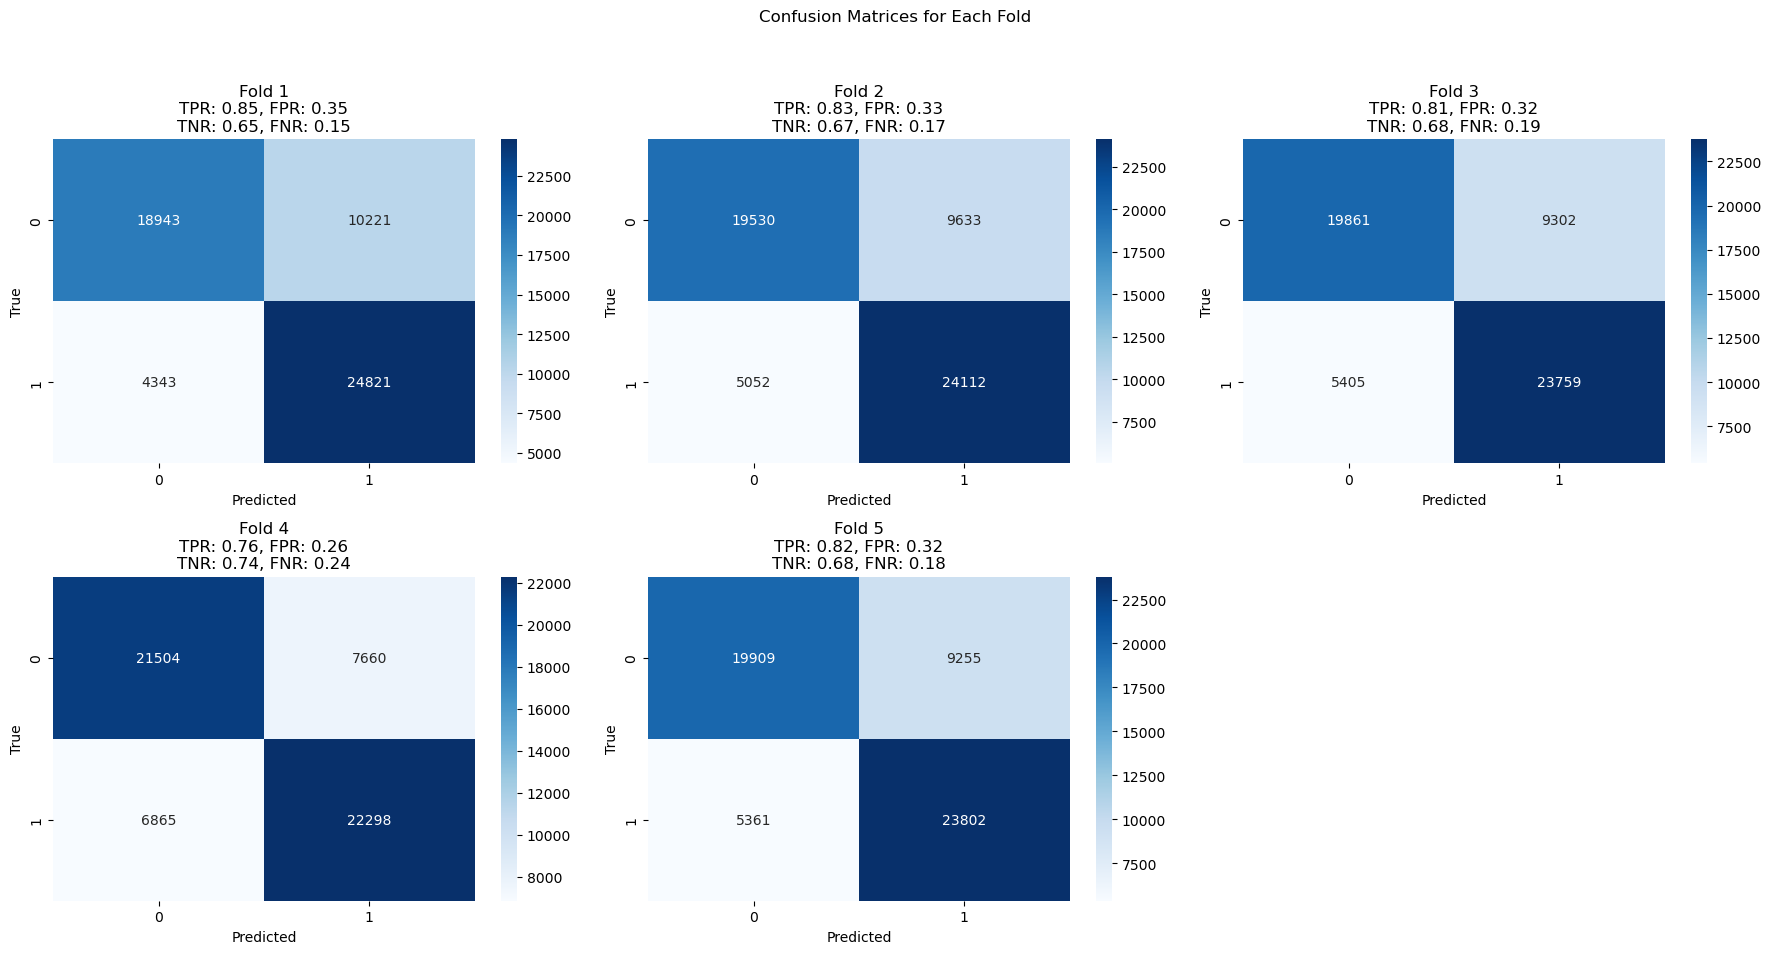

In [60]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

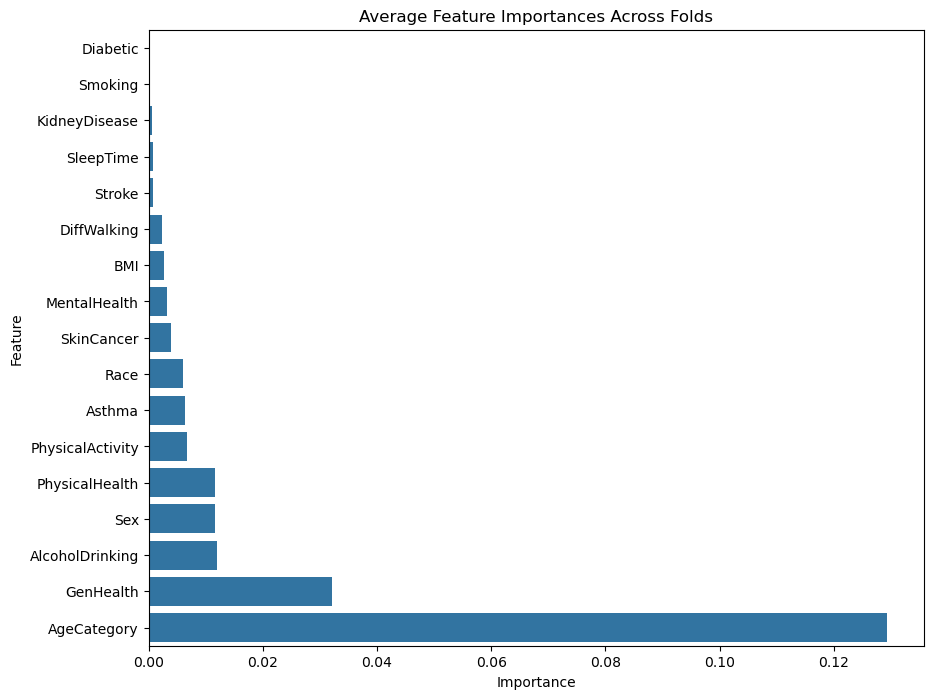

In [61]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

----

K mean SMOTE

After K mean SMOTE:
Yes: 20403
No: 147281


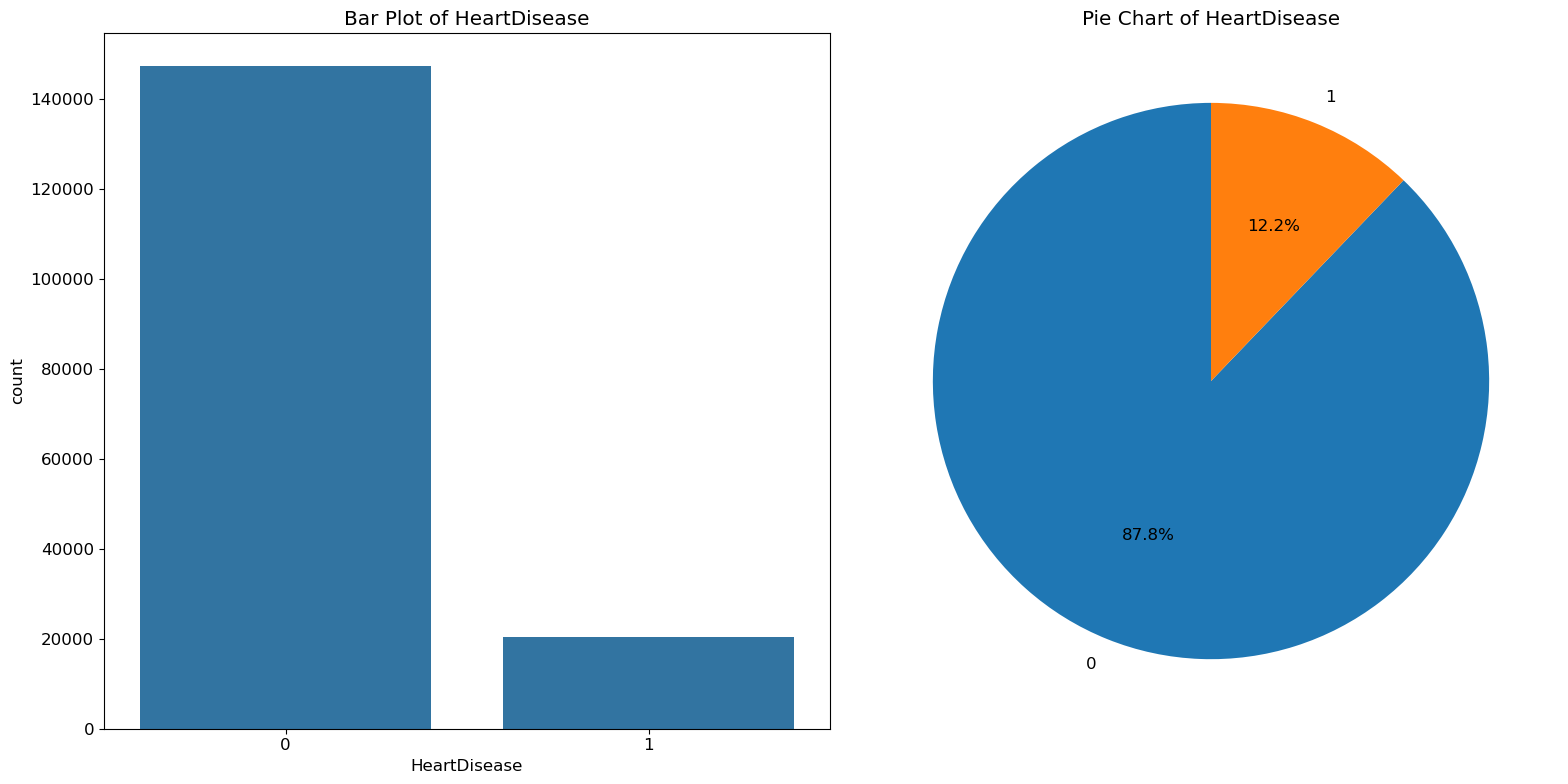

In [121]:

KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)

x_resampled, y_resampled  = KSMOTE.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After K mean SMOTE:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

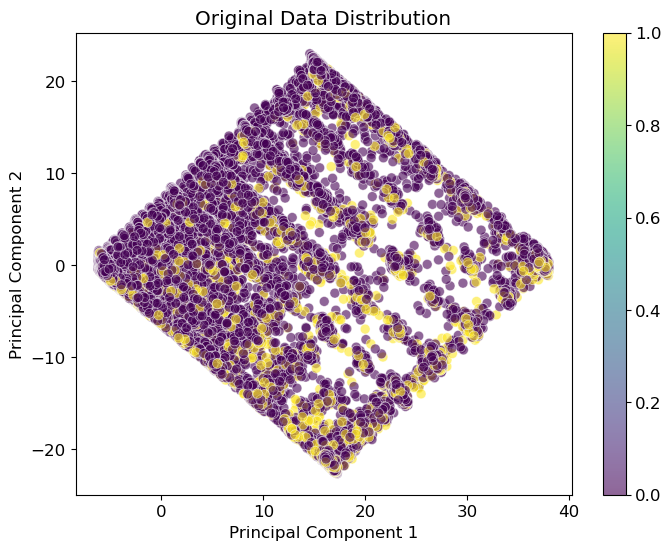

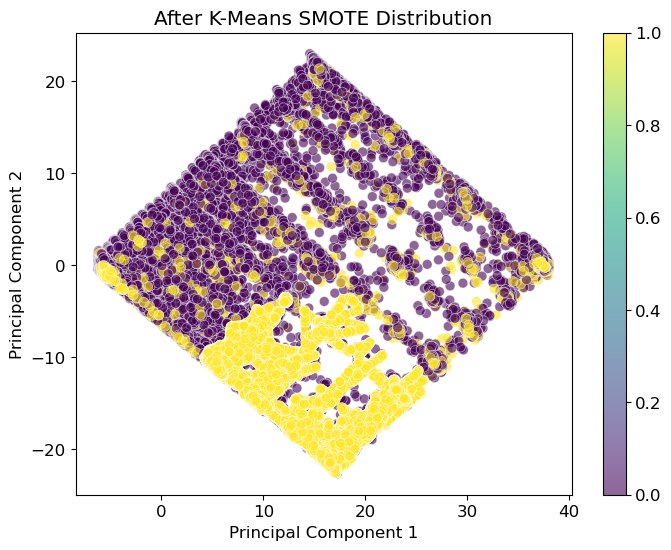

In [122]:
from sklearn.decomposition import PCA  # For dimensionality reduction

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy plotting
x_original_pca = pca.fit_transform(x_train)
x_resampled_pca = pca.transform(x_resampled)

# Function to plot the data
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, cmap='viridis',
                          edgecolors='w', s=50, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter)
    plt.show()

# Visualize original data
plot_data(x_original_pca, y_train, 'Original Data Distribution')

# Visualize data after K-Means SMOTE
plot_data(x_resampled_pca, y_resampled, 'After K-Means SMOTE Distribution')

Training for fold 1 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 701us/step - binary_accuracy: 0.9006 - loss: 0.2855
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 693us/step - binary_accuracy: 0.9091 - loss: 0.2574
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 719us/step - binary_accuracy: 0.9088 - loss: 0.2572
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step
Score for fold 1: loss of 0.23767557740211487; compile_metrics of 91.59098863601685%

Training for fold 2 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 709us/step - binary_accuracy: 0.8997 - loss: 0.2879
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 706us/step - binary_accuracy: 0.9091 - loss: 0.2571
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 705us/step - binary_accuracy: 0.9107 - loss: 0.2567
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
Score for fold 2: loss of 0.24561455845832825; compile_metrics of 91.31600856781006%

Training for fold 3 ...


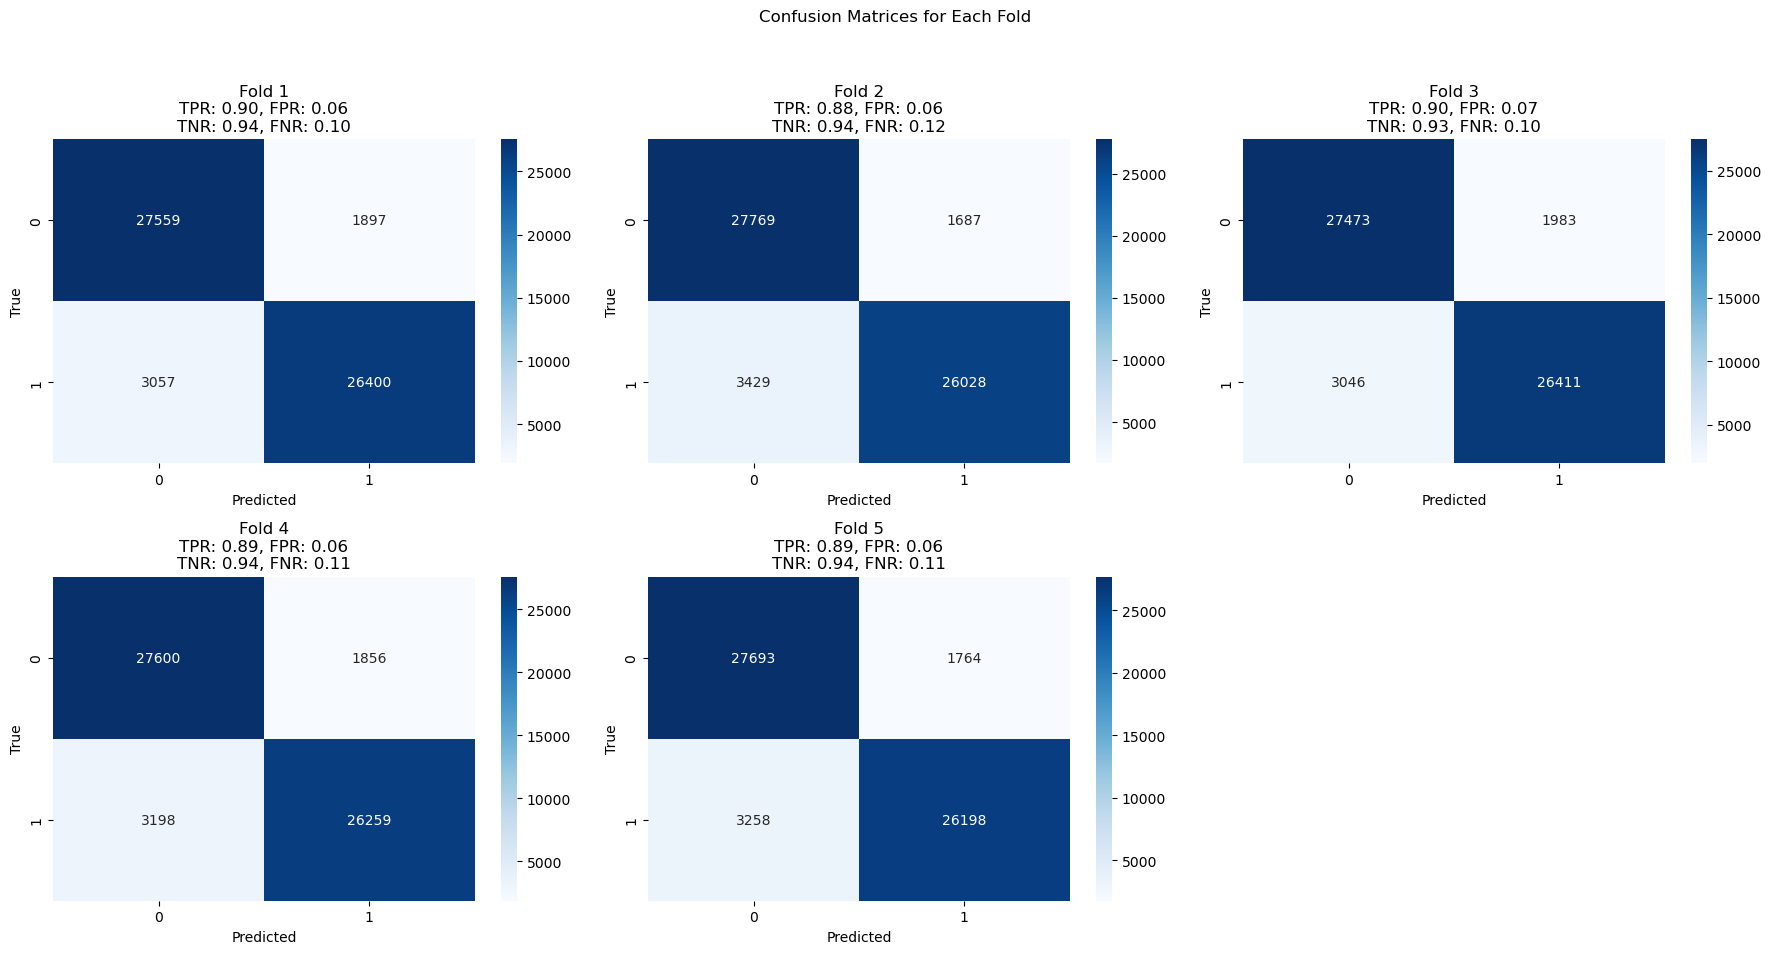

In [63]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


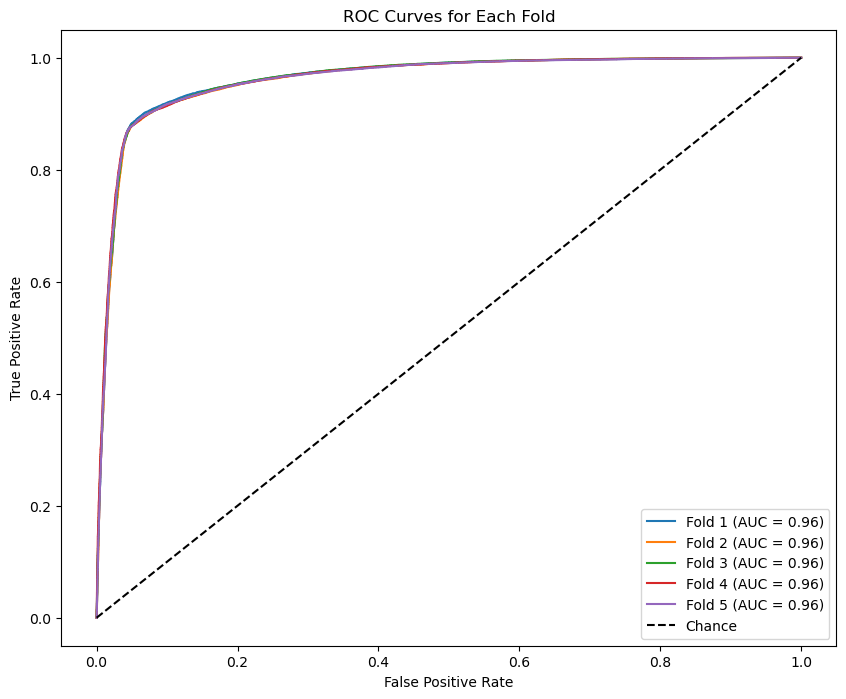

In [64]:
from sklearn.metrics import roc_curve, auc as calculate_auc  # Renaming the function during import

plt.figure(figsize=(10, 8))

# Retrieve and store the train and test indices from the kfold split
split_indices = list(kfold.split(x_train, y_train))

for i, (train_index, test_index) in enumerate(split_indices):
    # Generate predictions
    y_pred_prob = model.predict(x_train.iloc[test_index]).ravel()
    y_true = y_train.iloc[test_index]

    # Compute ROC curve and ROC area for each fold
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = calculate_auc(fpr, tpr)  # Using the renamed function

    # Plot
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Fold')
plt.legend(loc='lower right')
plt.show()


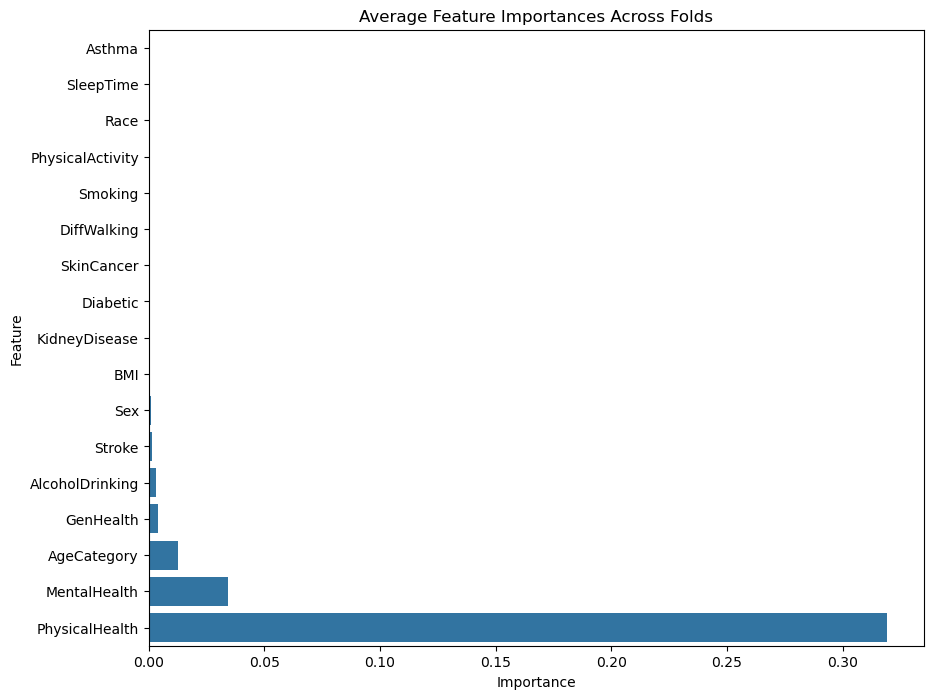

In [65]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

----

### One Hot Encoding

In [107]:

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obesity Class I'
    elif bmi < 40:
        return 'Obesity Class II'
    else:
        return 'Obesity Class III'

df['BMICategory'] = df['BMI'].apply(categorize_bmi)

categorical_columns = ['AgeCategory', 'Race', 'GenHealth'
                       , 'BMICategory']  

one_hot_encoded_df = pd.get_dummies(
    df[categorical_columns], columns=categorical_columns, drop_first=False)

df = df.reset_index(drop=True)

original_categorical_data = df[categorical_columns]

# Applying one-hot encoding to the categorical columns from the original DataFrame
one_hot_encoded_df = pd.get_dummies(
    original_categorical_data, columns=categorical_columns, drop_first=False)

# Dropping the original categorical columns from df to avoid duplication
df_clean_dropped = df.drop(categorical_columns, axis=1)

# Concatenating the one-hot encoded DataFrame back with the modified df_clean
df_clean_onehot = pd.concat([df_clean_dropped, one_hot_encoded_df], axis=1)

one_hot_columns = one_hot_encoded_df.columns.tolist()  
for col in one_hot_columns:
    if df_clean_onehot[col].dtype != 'int64':
        df_clean_onehot[col] = df_clean_onehot[col].astype(int)

# Verify the DataFrame structure and integrity
df_clean_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288496 entries, 0 to 288495
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         288496 non-null  int64  
 1   BMI                                  288496 non-null  float64
 2   Smoking                              288496 non-null  int64  
 3   AlcoholDrinking                      288496 non-null  int64  
 4   Stroke                               288496 non-null  int64  
 5   PhysicalHealth                       288496 non-null  float64
 6   MentalHealth                         288496 non-null  float64
 7   DiffWalking                          288496 non-null  int64  
 8   Sex                                  288496 non-null  int64  
 9   Diabetic                             288496 non-null  int64  
 10  PhysicalActivity                     288496 non-null  int64  
 11  SleepTime    

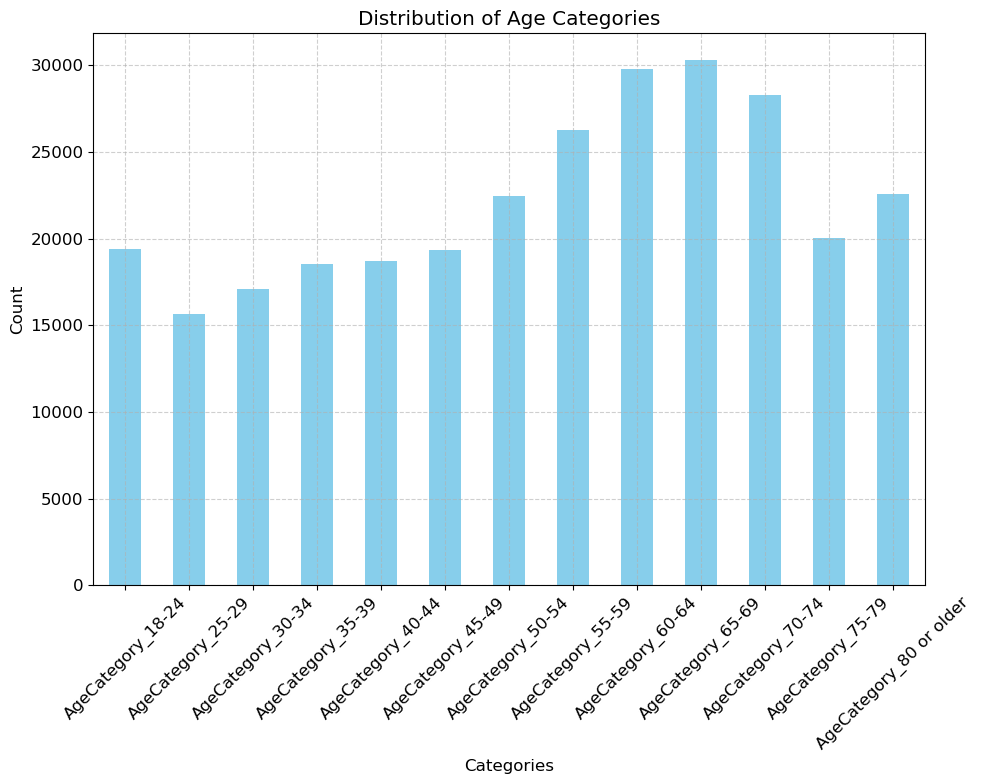

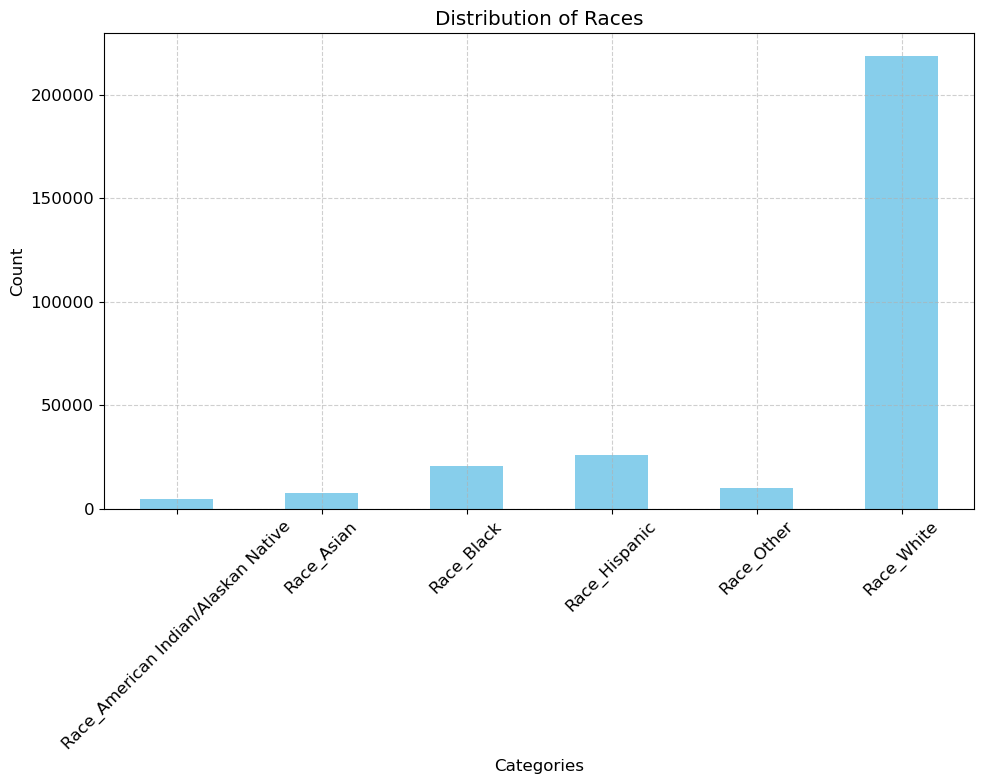

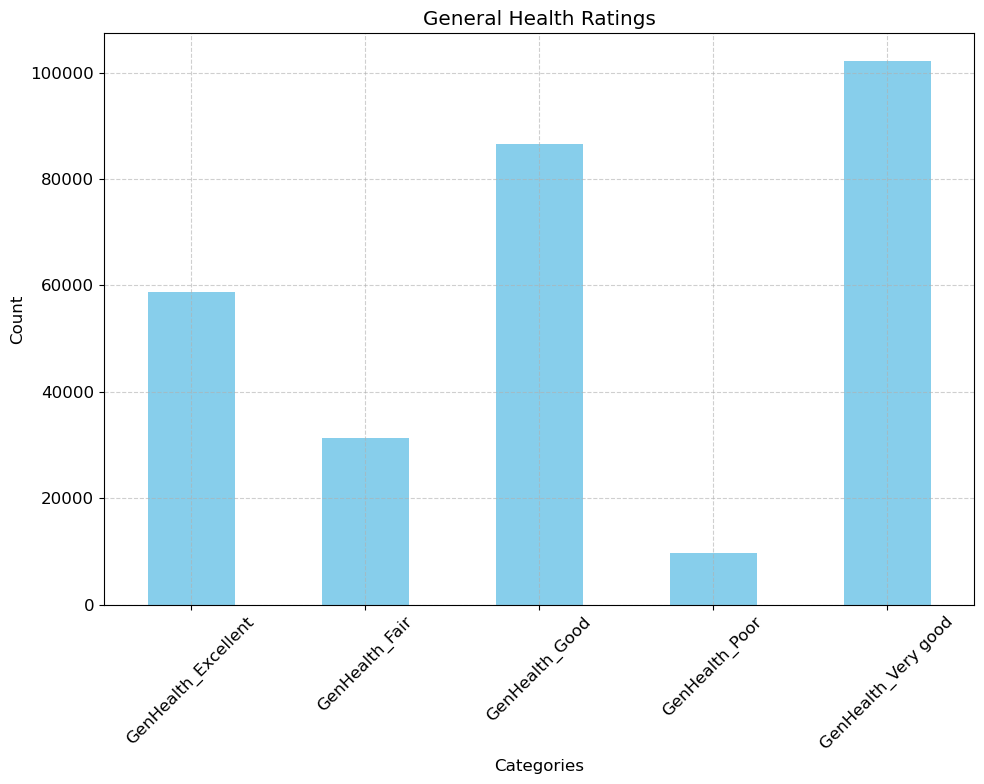

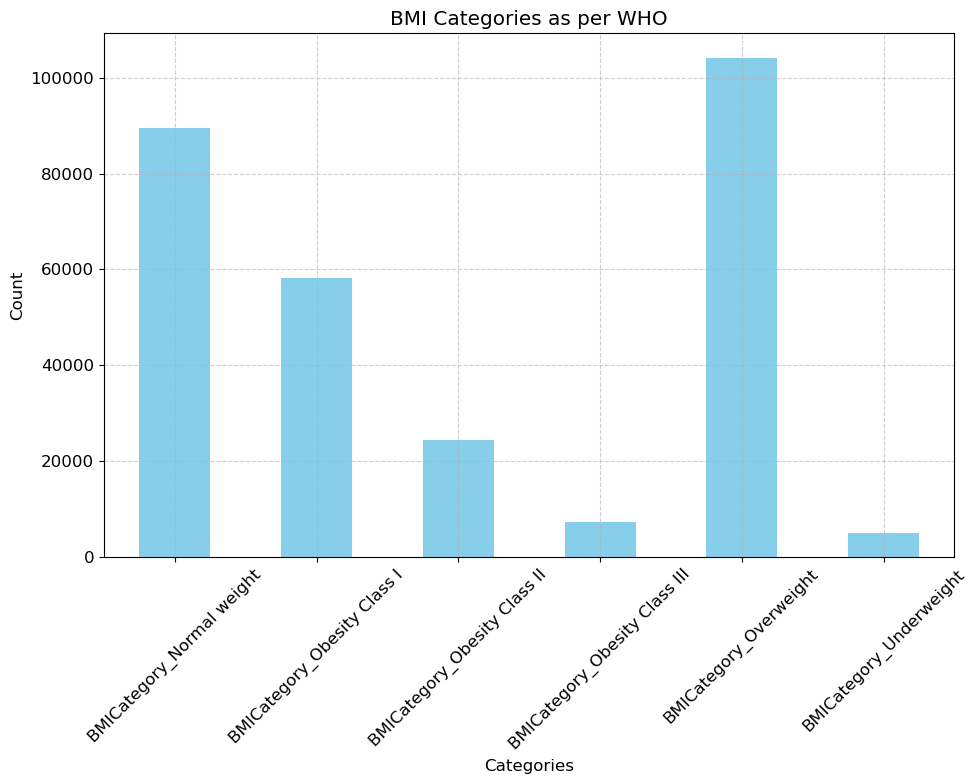

In [108]:
# Summing up the one-hot encoded columns for each category
age_sums = df_clean_onehot.filter(regex='AgeCategory').sum()
race_sums = df_clean_onehot.filter(regex='Race').sum()
gen_health_sums = df_clean_onehot.filter(regex='GenHealth').sum()
bmi_category_sums = df_clean_onehot.filter(regex='BMICategory').sum()

# Function to plot the data
def plot_data(data, title, ylabel):
    fig, ax = plt.subplots(figsize=(10, 8))
    data.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Categories')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plotting the results
plot_data(age_sums, 'Distribution of Age Categories', 'Count')
plot_data(race_sums, 'Distribution of Races', 'Count')
plot_data(gen_health_sums, 'General Health Ratings', 'Count')
plot_data(bmi_category_sums, 'BMI Categories as per WHO', 'Count')

Before:
Yes: 20440
No: 210356
After K mean SMOTE:
Yes: 210357
No: 210356


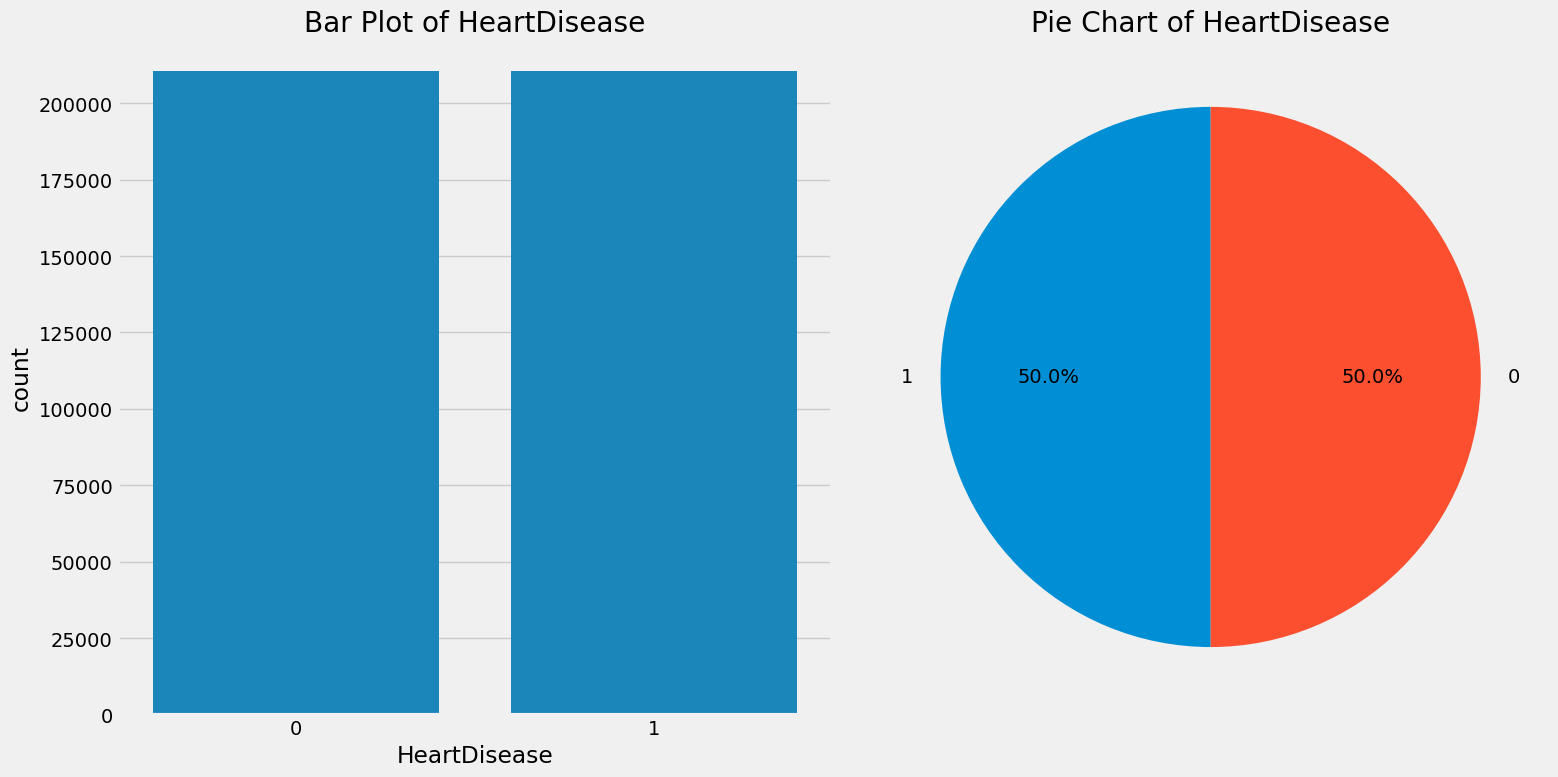

In [16]:
x,y = df_clean_onehot.drop(["HeartDisease"], axis=1), df_clean_onehot["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

counts_before = y_train.value_counts()
print("Before:")
print(f"Yes: {counts_before.get(1, 0)}")  # get(1, 0) returns the count of '1' (yes), defaults to 0 if not present
print(f"No: {counts_before.get(0, 0)}")  # get(0, 0) returns the count of '0' (no), defaults to 0 if not present

KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)
x_train, y_train = KSMOTE.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After K mean SMOTE:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 8s 711us/step - binary_accuracy: 0.9254 - loss: 0.2134
Epoch 2/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 7s 711us/step - binary_accuracy: 0.9380 - loss: 0.1717
Epoch 3/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 8s 719us/step - binary_accuracy: 0.9393 - loss: 0.1653
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step
Score for fold 1: loss of 0.15229679644107819; compile_metrics of 94.32395100593567%

Training for fold 2 ...
Epoch 1/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 8s 702us/step - binary_accuracy: 0.9251 - loss: 0.2169
Epoch 2/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 7s 703us/step - binary_accuracy: 0.9381 - loss: 0.1704
Epoch 3/3
10518/10518 ━━━━━━━━━━━━━━━━━━━━ 7s 705us/step - binary_accuracy: 0.9391 - loss: 0.1652
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step
Score for fold 2: loss of 0.15389931201934814; compile_metrics of 94.31087374687195%

Training for

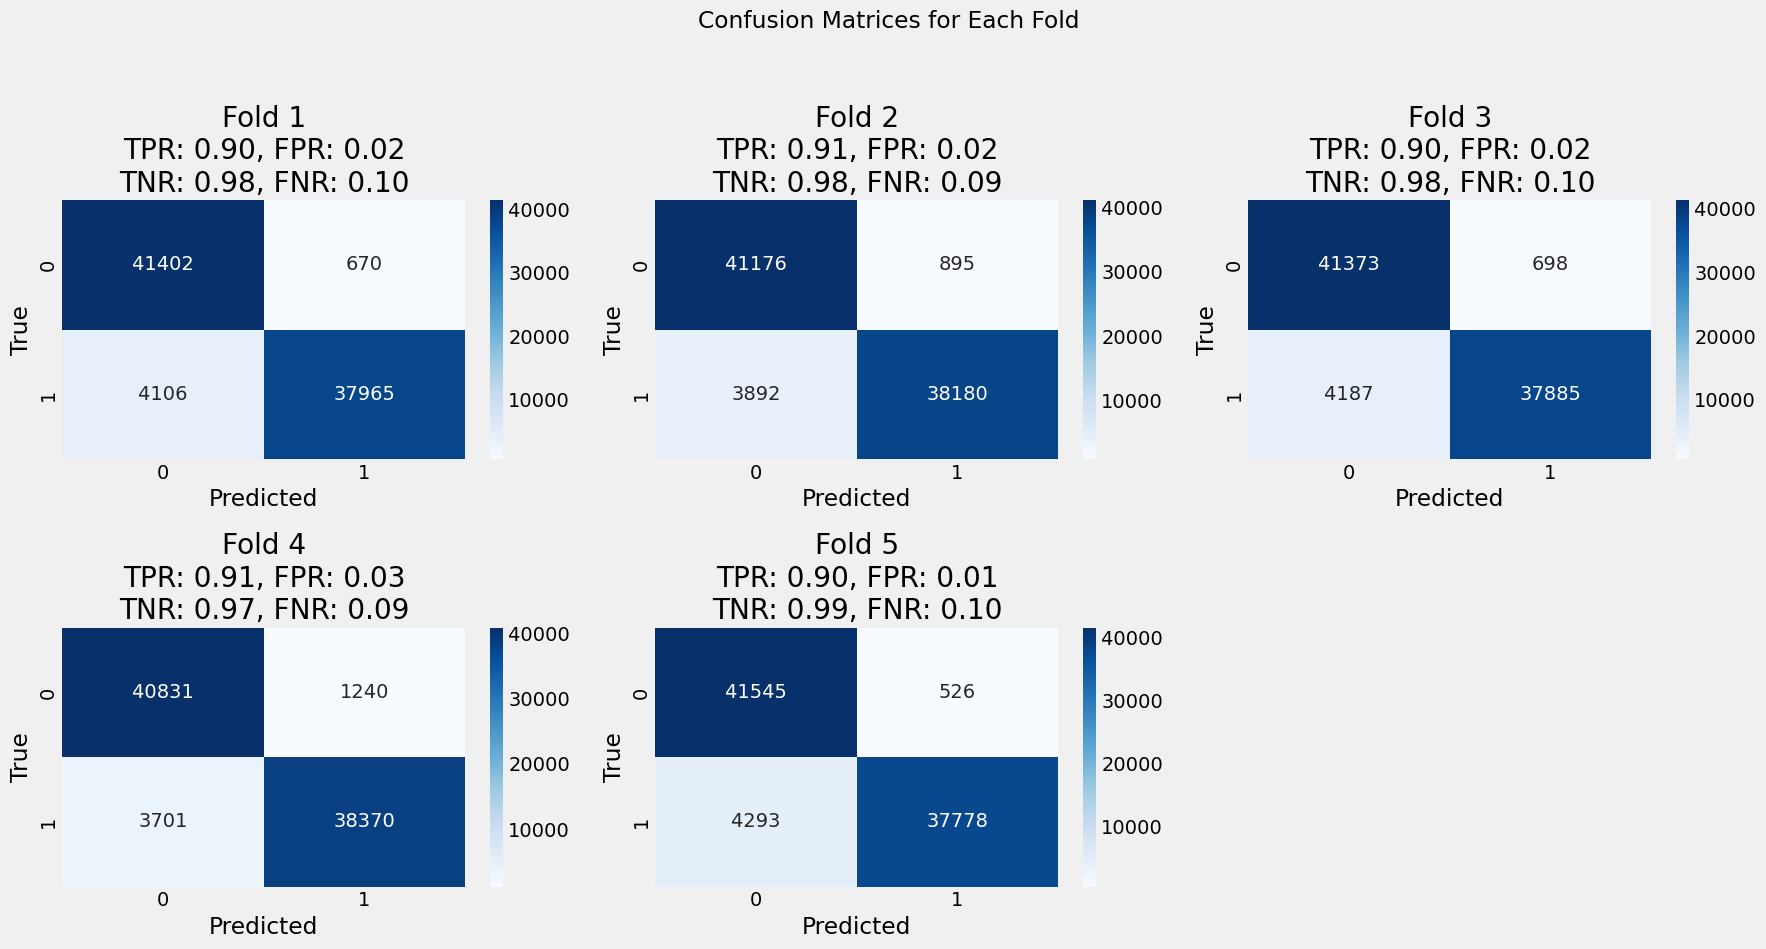

In [19]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

                            Feature     mean      std
                     PhysicalHealth 0.091811 0.033005
                GenHealth_Very good 0.051077 0.015472
                     GenHealth_Good 0.038580 0.013511
                       MentalHealth 0.033824 0.005222
                GenHealth_Excellent 0.025467 0.008937
                  AgeCategory_18-24 0.019878 0.003006
                  AgeCategory_30-34 0.019399 0.003138
                  AgeCategory_35-39 0.017364 0.005006
                  AgeCategory_25-29 0.016592 0.002319
                  AgeCategory_60-64 0.016080 0.005521
                  AgeCategory_55-59 0.015627 0.005424
                  AgeCategory_40-44 0.015521 0.004503
                  AgeCategory_65-69 0.015018 0.005955
                  AgeCategory_45-49 0.014917 0.004760
                  AgeCategory_50-54 0.013993 0.004953
                     GenHealth_Fair 0.012412 0.003265
                  AgeCategory_70-74 0.011650 0.004676
                         Rac

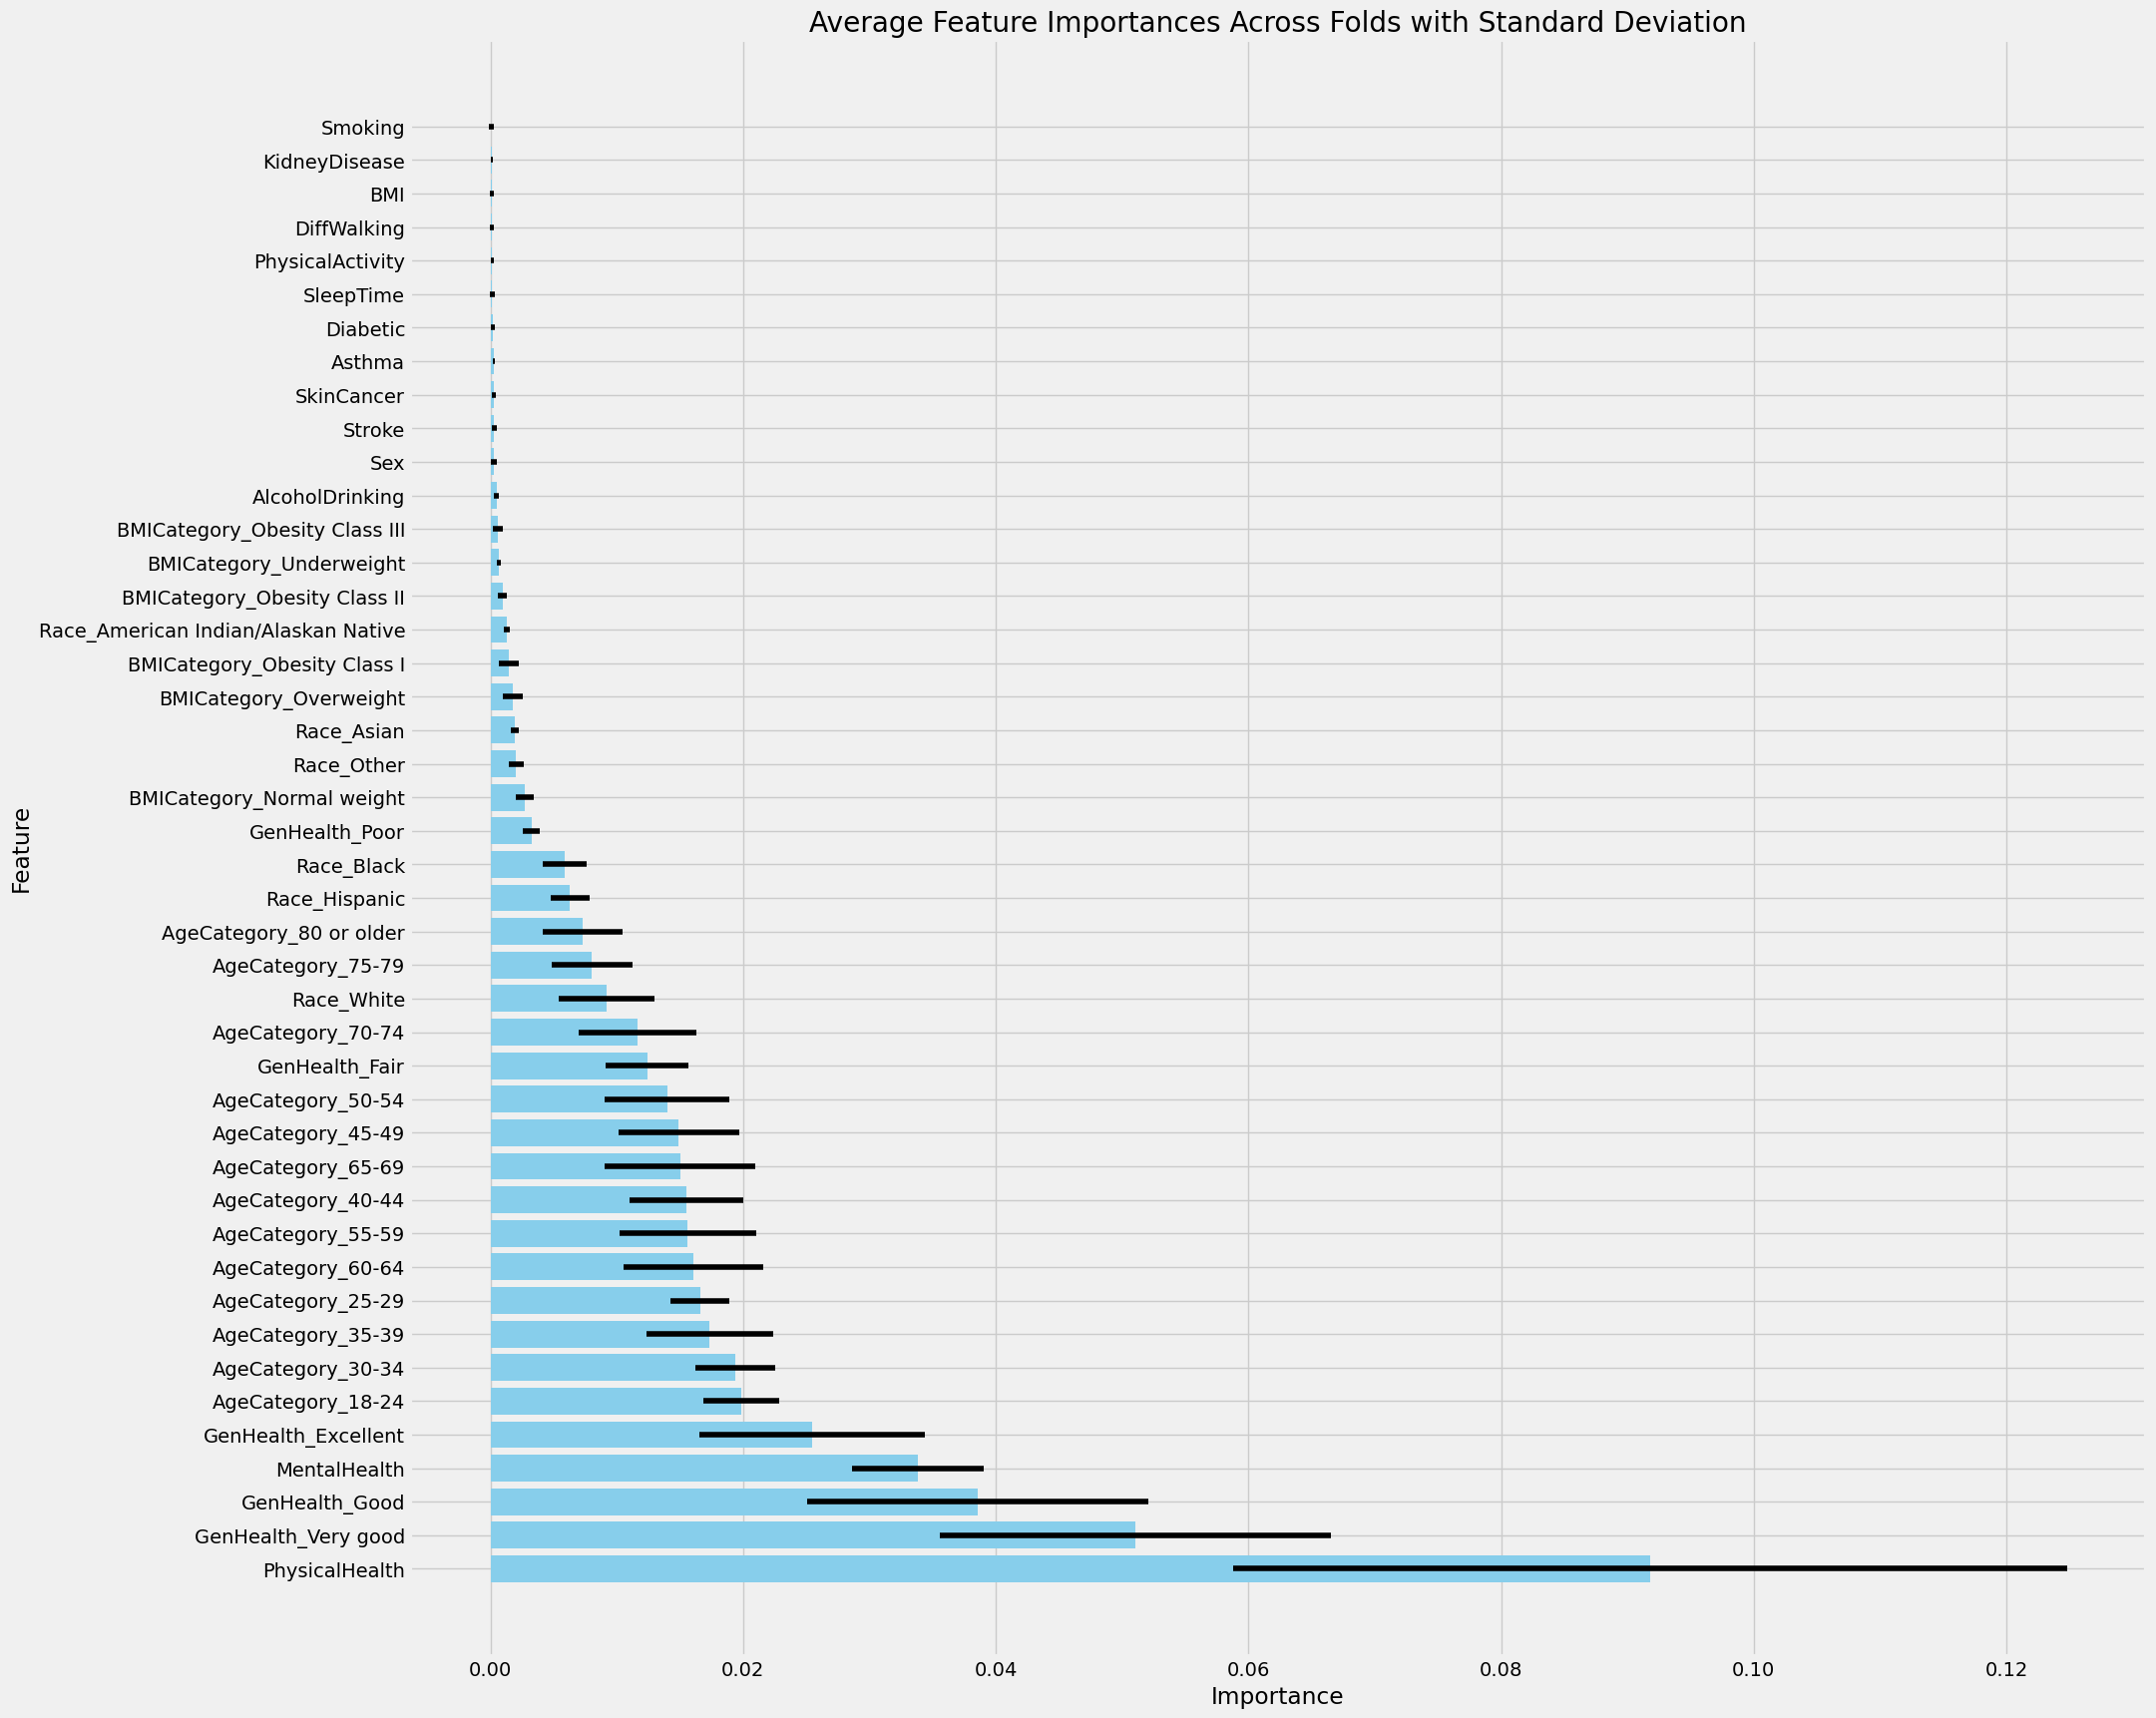

In [31]:
feature_stats = all_importances.groupby('Feature').Importance.agg(['mean', 'std']).reset_index()
feature_stats = feature_stats.sort_values(by='mean', ascending=False)

# Display the DataFrame in a well-formatted manner
print(feature_stats.to_string(index=False))

# Create the plot
plt.figure(figsize=(20, 20))
bars = plt.barh(feature_stats['Feature'], feature_stats['mean'], color='skyblue')
plt.barh(feature_stats['Feature'], feature_stats['mean'], xerr=feature_stats['std'], align='center', color='skyblue')
plt.title('Average Feature Importances Across Folds with Standard Deviation')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()